In [36]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)


# Chargement des données depuis Excel
path = "/kaggle/input/taux-de-chmage-au-maroc-20062025/Taux de chomage au Maroc.xlsx"
df_milieu = pd.read_excel(path, sheet_name='selon le milieu')
df_diplome = pd.read_excel(path, sheet_name='selon le diplôme')
df_sexe = pd.read_excel(path, sheet_name='selon le sexe')
df_tranche_age = pd.read_excel(path, sheet_name="selon les tranches d'âge")

# Tri des données du plus récent au plus ancien
dfs = [df_milieu, df_diplome, df_sexe, df_tranche_age]
dfs = [df.sort_index(ascending=False).reset_index(drop=True) for df in dfs]
df_milieu, df_diplome, df_sexe, df_tranche_age = dfs

# Nettoyage des noms de colonnes : supprimer les espaces insécables et espaces normaux
df_diplome.columns = df_diplome.columns.str.replace('\xa0', '', regex=False)
df_diplome.columns = df_diplome.columns.str.strip()
df_tranche_age.columns = df_tranche_age.columns.str.replace('\xa0', '', regex=False).str.strip()


# Aperçu rapide
print(df_milieu.head())
print(df_diplome.head())
print(df_sexe.head())
print(df_tranche_age.head())


  Trimestre     Urbain     Rural   Ensemble
0   2006T1   15.281147  3.748461   9.641875
1   2006T2   13.245954  2.421061   7.771524
2   2006T3   16.043811  3.927318  10.128643
3   2006T4   17.173960  4.360405  10.944385
4   2007T1   15.845302  3.915245  10.070861
  Trimestres  Sans diplôme  Ayant un diplôme:  Niveau moyen  \
0    2006T1       5.109467                        18.452248   
1    2006T2       3.781205                        15.524590   
2    2006T3       4.974598                        19.441741   
3    2006T4       5.483642                        20.911979   
4    2007T1       5.210493                        19.482125   

   Ayant un diplôme:  Niveau supérieur   Ensemble  
0                            18.871304   9.641875  
1                            17.091774   7.771524  
2                            20.717811  10.128643  
3                            21.400222  10.944385  
4                            20.206889  10.070861  
  Trimestre   Masculin    Féminin   Ensemble


## Visualisation du taux de chômage par milieu

Dans cette section, nous allons **visualiser l’évolution trimestrielle du taux de chômage au Maroc** en fonction du milieu de résidence :  

- **Urbain**  
- **Rural**  
- **Ensemble** (global)  

L’objectif est de comparer les tendances entre les zones urbaines et rurales sur la période étudiée.  
Le graphique ci-dessous permet d’observer facilement ces différences et d’identifier les variations au fil du temps.


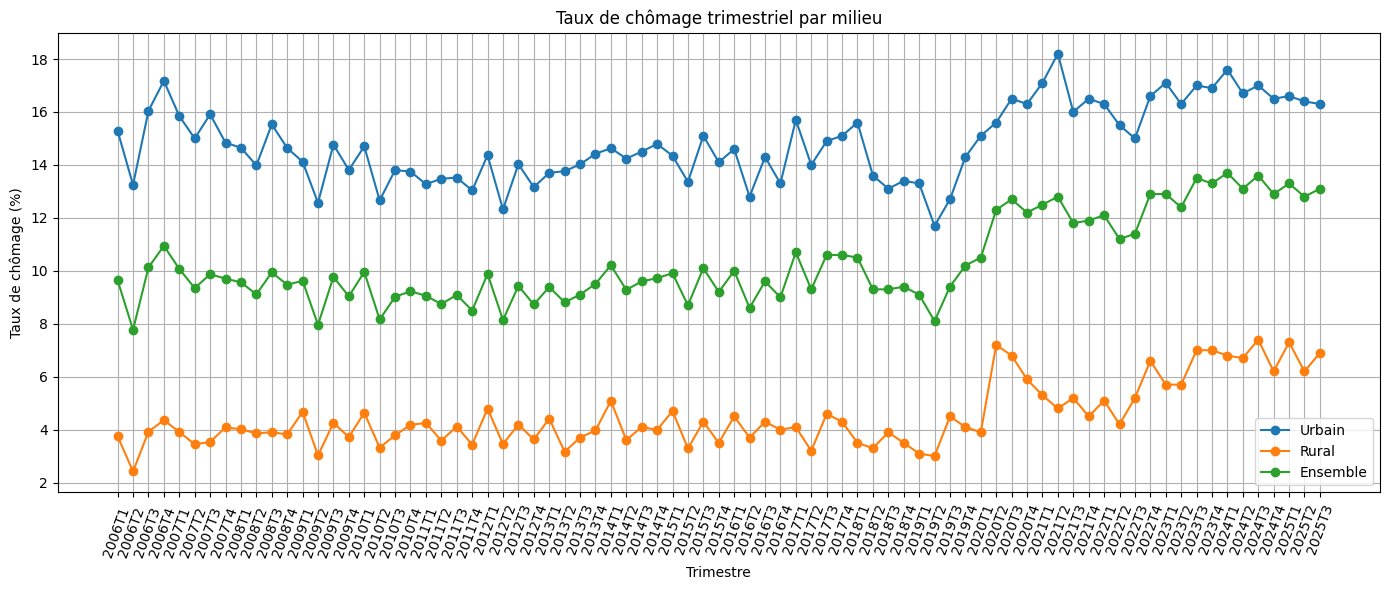

In [2]:
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], df_milieu['Urbain'], marker='o', label='Urbain')
plt.plot(df_milieu['Trimestre'], df_milieu['Rural'], marker='o', label='Rural')
plt.plot(df_milieu['Trimestre'], df_milieu['Ensemble'], marker='o', label='Ensemble')

plt.xticks(rotation=70)
plt.title("Taux de chômage trimestriel par milieu")
plt.xlabel("Trimestre")
plt.ylabel("Taux de chômage (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Analyse de la tendance du chômage avec moyenne mobile

Dans cette section, nous allons calculer et visualiser **la tendance du taux de chômage au Maroc** en utilisant une **moyenne mobile centrée sur 4 trimestres**.  

Nous afficherons séparément les tendances pour :  
- **Urbain** : taux de chômage en milieu urbain  
- **Rural** : taux de chômage en milieu rural  
- **Ensemble** : taux de chômage global national  

Ces graphiques permettent de mieux comprendre **les variations à long terme** et de distinguer les fluctuations saisonnières ou ponctuelles des tendances générales.


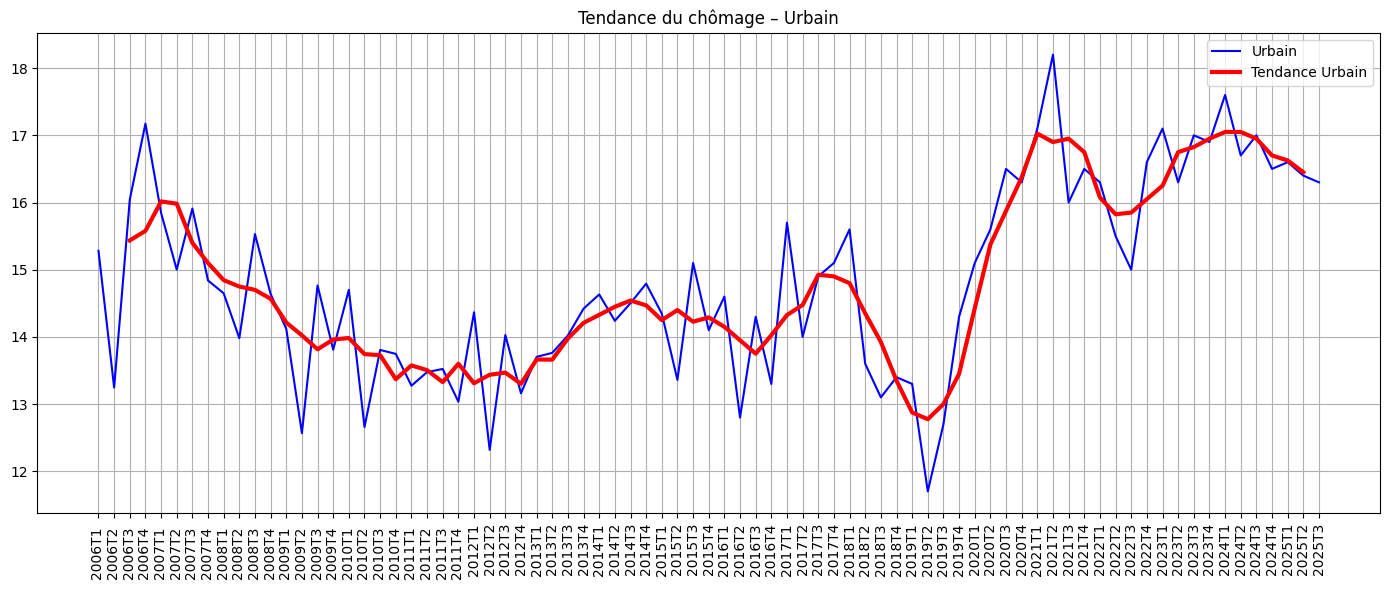

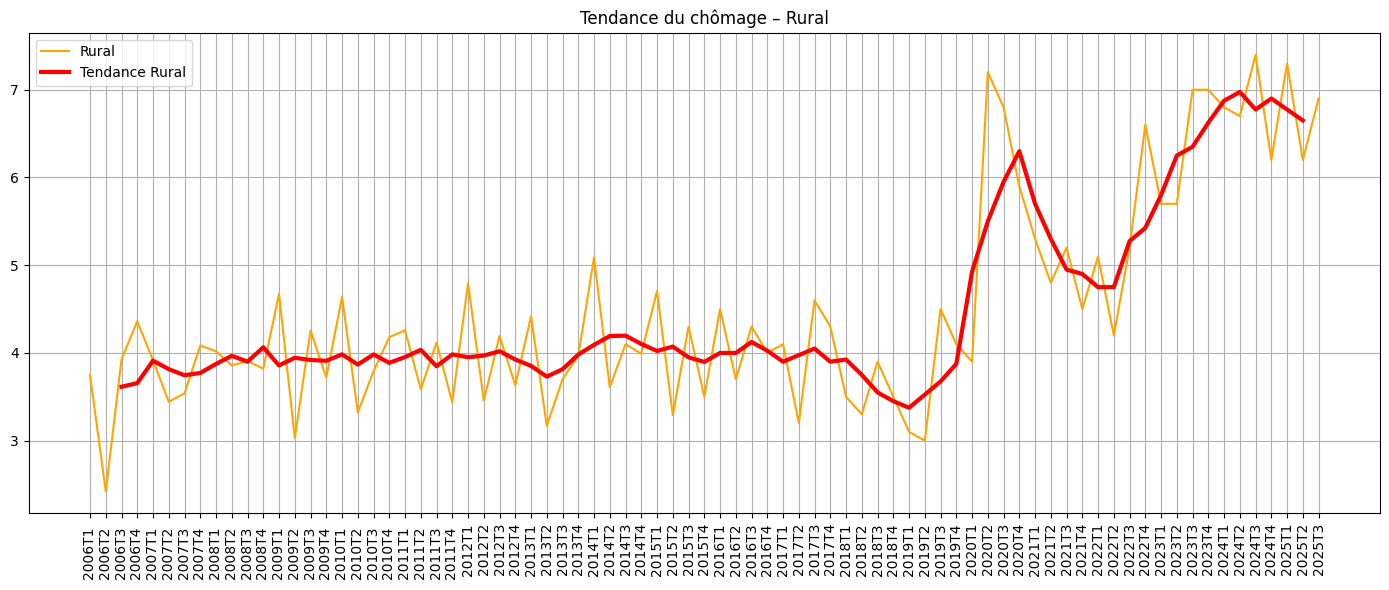

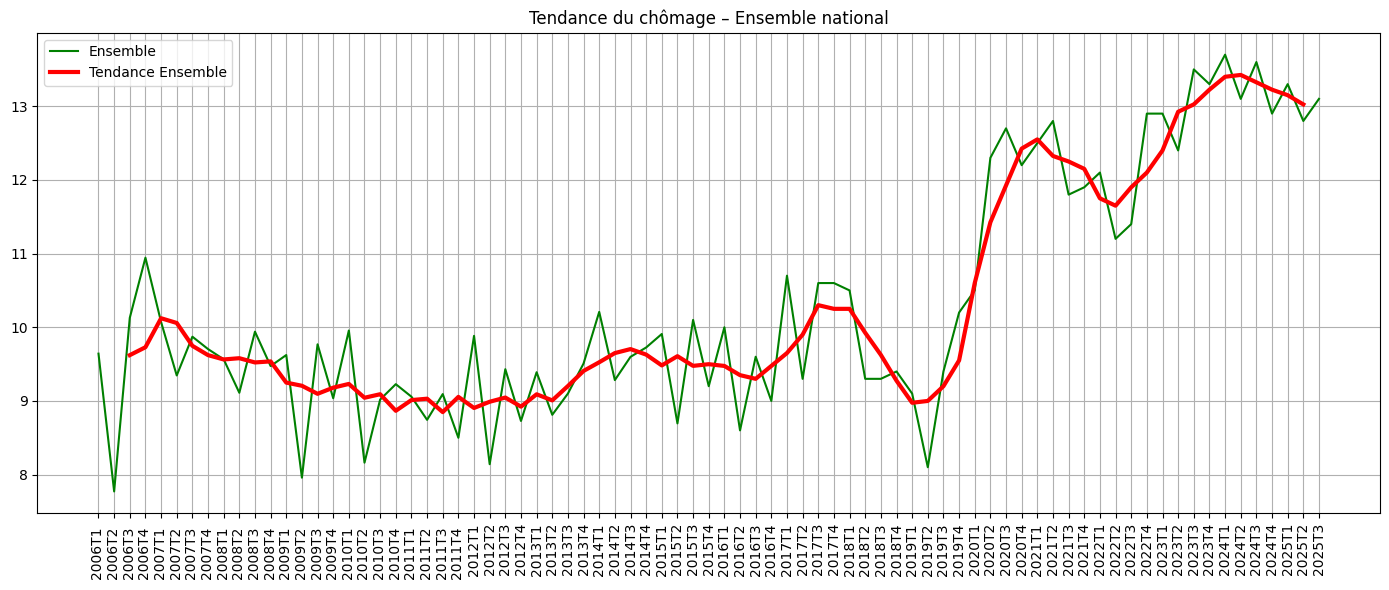

In [3]:
# Calcul de la tendance avec moyenne mobile centrée (fenêtre = 4 trimestres)
df_milieu['Tendance_Urbain']   = df_milieu['Urbain'].rolling(window=4, center=True).mean()
df_milieu['Tendance_Rural']    = df_milieu['Rural'].rolling(window=4, center=True).mean()
df_milieu['Tendance_Ensemble'] = df_milieu['Ensemble'].rolling(window=4, center=True).mean()

# ----------- Tracé pour Urbain -----------
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], df_milieu['Urbain'], label='Urbain', color='blue')
plt.plot(df_milieu['Trimestre'], df_milieu['Tendance_Urbain'], linewidth=3, label='Tendance Urbain', color='red')
plt.xticks(rotation=90)
plt.title("Tendance du chômage – Urbain")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------- Tracé pour Rural -----------
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], df_milieu['Rural'], label='Rural', color='orange')
plt.plot(df_milieu['Trimestre'], df_milieu['Tendance_Rural'], linewidth=3, label='Tendance Rural', color='red')
plt.xticks(rotation=90)
plt.title("Tendance du chômage – Rural")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------- Tracé pour Ensemble -----------
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], df_milieu['Ensemble'], label='Ensemble', color='green')
plt.plot(df_milieu['Trimestre'], df_milieu['Tendance_Ensemble'], linewidth=3, label='Tendance Ensemble', color='red')
plt.xticks(rotation=90)
plt.title("Tendance du chômage – Ensemble national")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


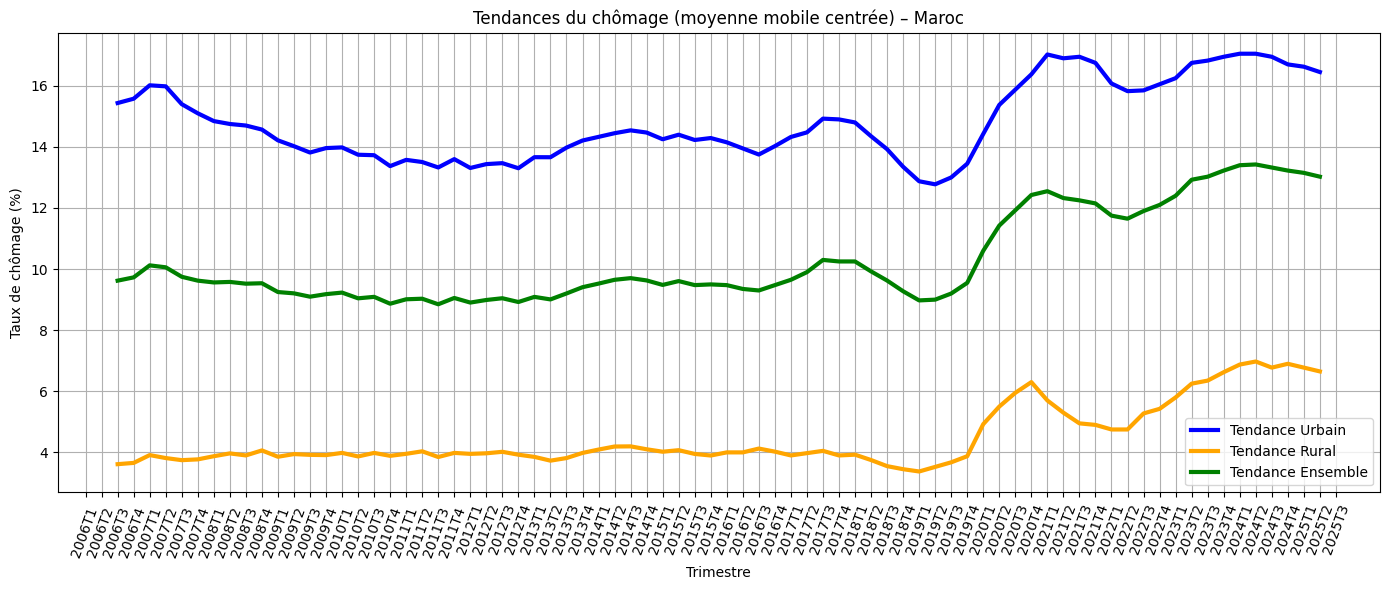

In [4]:
# Tracé des trois tendances sur un seul graphique
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], df_milieu['Tendance_Urbain'], linewidth=3, label='Tendance Urbain', color='blue')
plt.plot(df_milieu['Trimestre'], df_milieu['Tendance_Rural'], linewidth=3, label='Tendance Rural', color='orange')
plt.plot(df_milieu['Trimestre'], df_milieu['Tendance_Ensemble'], linewidth=3, label='Tendance Ensemble', color='green')

plt.xticks(rotation=70)
plt.title("Tendances du chômage (moyenne mobile centrée) – Maroc")
plt.xlabel("Trimestre")
plt.ylabel("Taux de chômage (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
df_milieu

Trimestre     Urbain     Rural   Ensemble  Tendance_Urbain  Tendance_Rural  \
0    2006T1   15.281147  3.748461   9.641875              NaN             NaN   
1    2006T2   13.245954  2.421061   7.771524              NaN             NaN   
2    2006T3   16.043811  3.927318  10.128643        15.436218        3.614311   
3    2006T4   17.173960  4.360405  10.944385        15.577257        3.656007   
4    2007T1   15.845302  3.915245  10.070861        16.015975        3.911577   
..       ...        ...       ...        ...              ...             ...   
74    2024T3  17.000000  7.400000  13.600000        16.950000        6.775000   
75    2024T4  16.500000  6.200000  12.900000        16.700000        6.900000   
76    2025T1  16.600000  7.300000  13.300000        16.625000        6.775000   
77    2025T2  16.400000  6.200000  12.800000        16.450000        6.650000   
78    2025T3  16.300000  6.900000  13.100000              NaN             NaN   

    Tendance_Ensemble  
0                 NaN  
1                 NaN  
2            9.621607  
3            9.728853  
4           10.122459  
..                ...  
74          13.325000  
75          13.225000  
76          13.150000  
77          13.025000  
78                NaN  

[79 rows x 7 columns]

## Analyse selon le diplôme

**Catégories étudiées :**
- Sans diplôme
- Ayant un diplôme de niveau moyen
- Ayant un diplôme de niveau supérieur
- Ensemble

**Méthodologie :**
1. Tracé des taux de chômage trimestriels pour chaque catégorie.
2. Calcul d’une tendance à l’aide d’une moyenne mobile centrée sur 4 trimestres pour lisser les variations.
3. Visualisation :
   - Graphique global comparant toutes les catégories.
   - Graphiques individuels pour chaque catégorie avec la tendance.
   - Graphique comparatif montrant uniquement les tendances.

**Objectif :** Identifier les différences de chômage selon le niveau d’éducation et observer les évolutions à long terme.

---

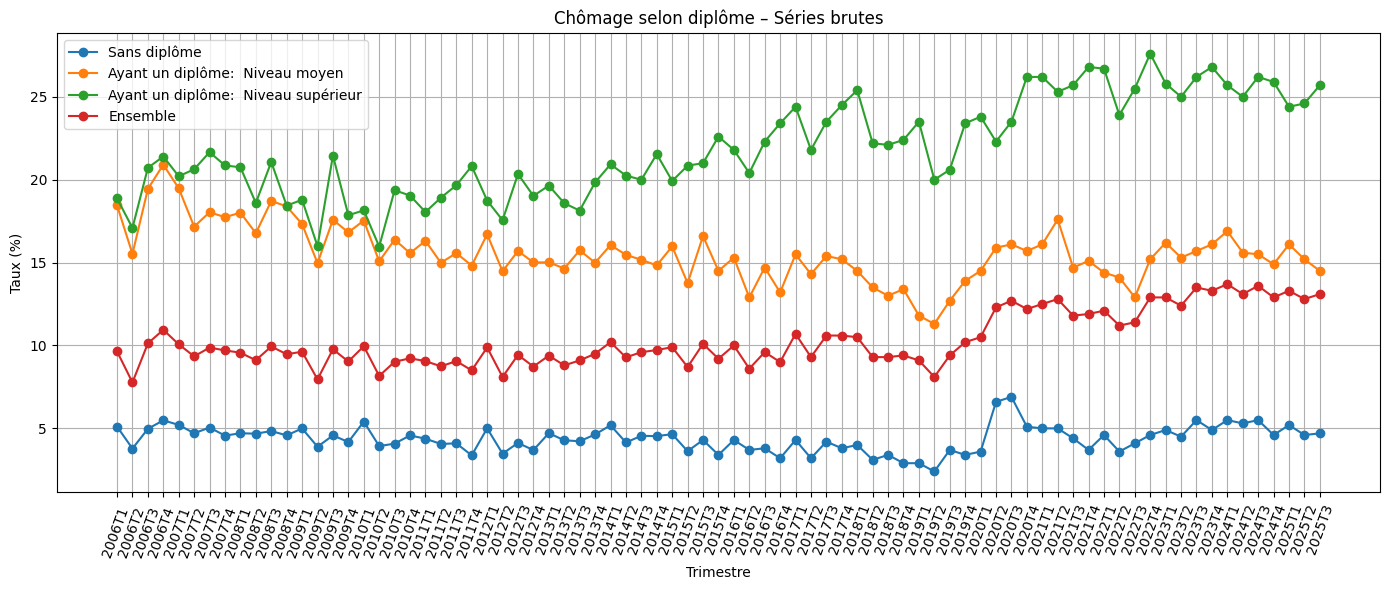

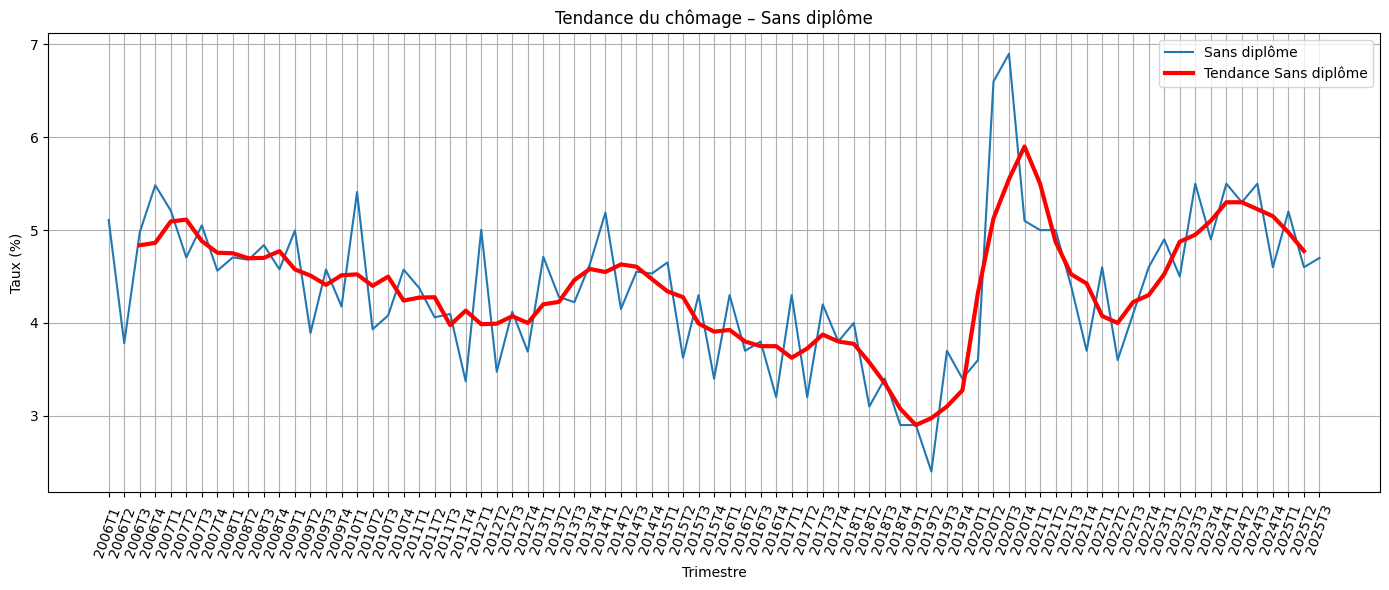

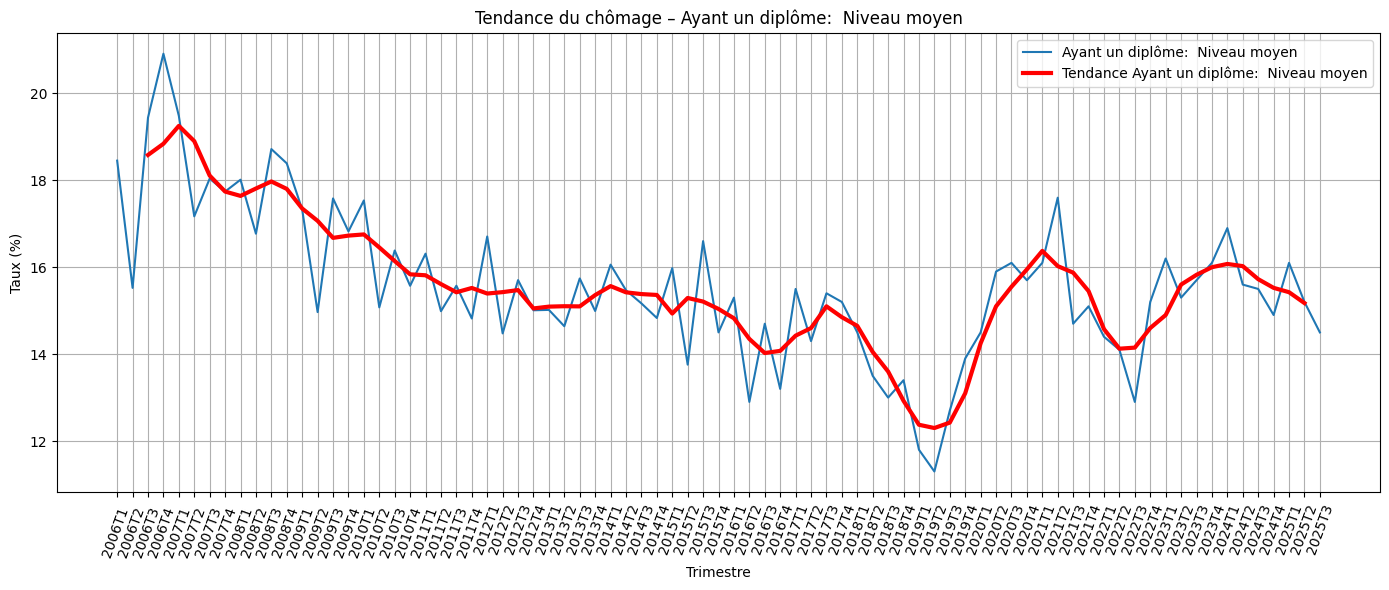

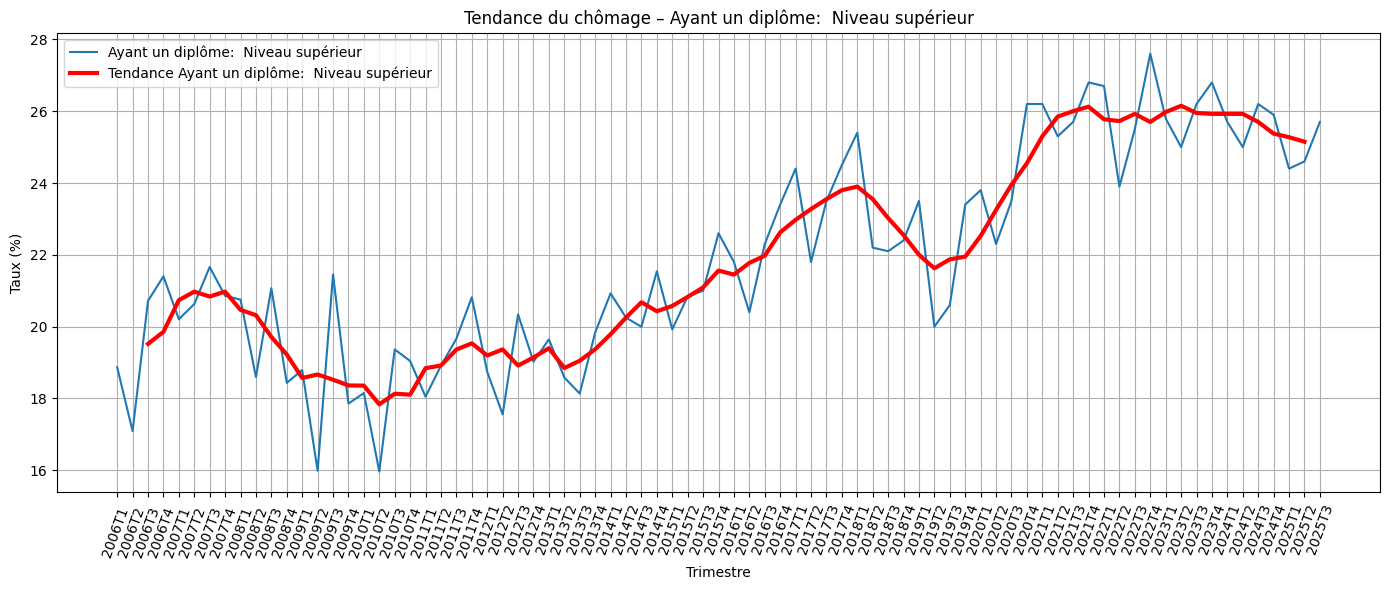

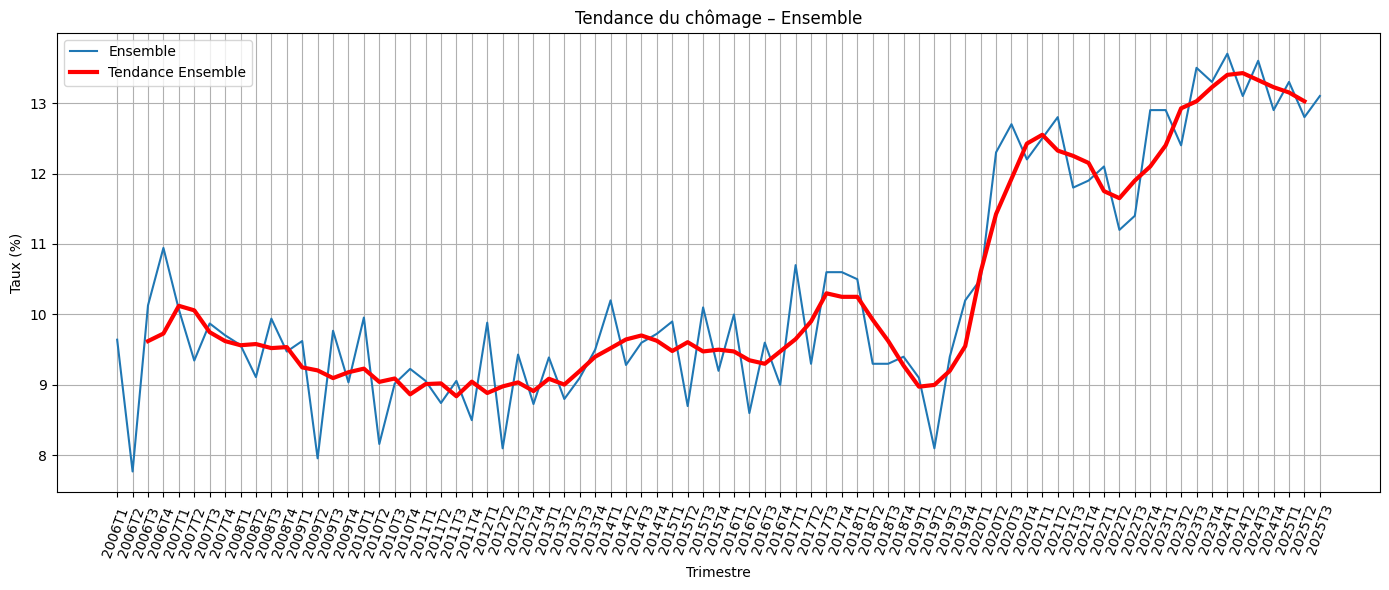

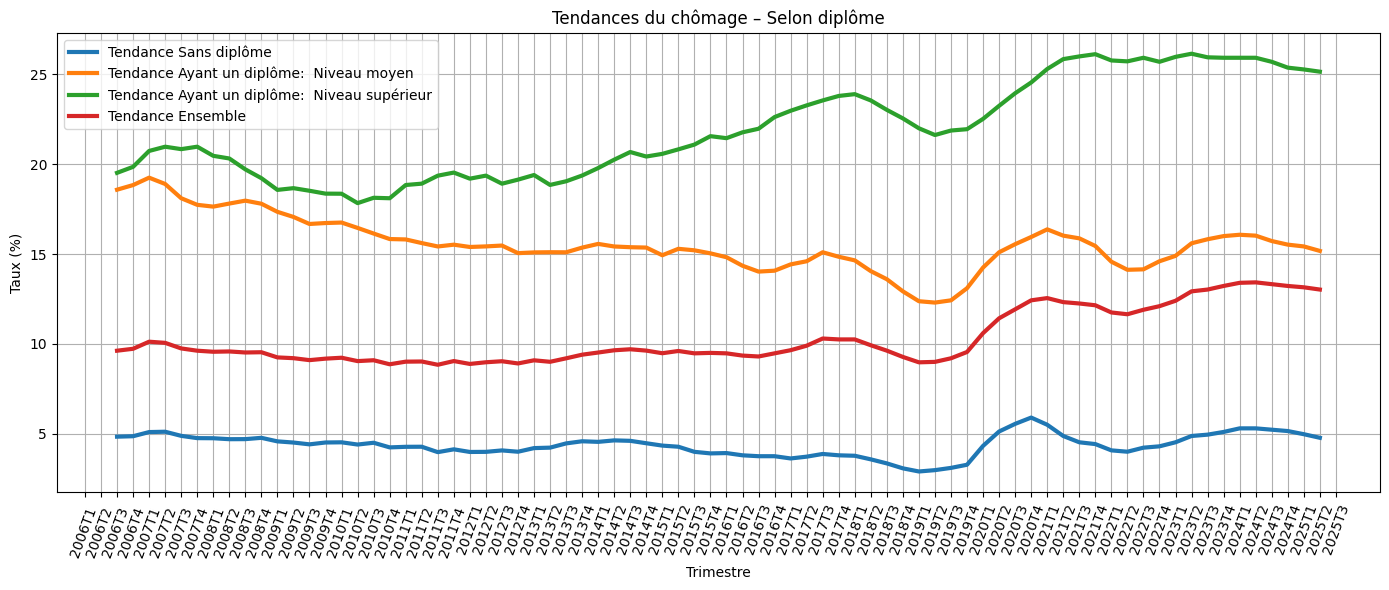

In [6]:
import matplotlib.pyplot as plt

# --- Colonnes de ton DataFrame ---
cols_diplome = [
    "Sans diplôme",
    "Ayant un diplôme:  Niveau moyen",
    "Ayant un diplôme:  Niveau supérieur",
    "Ensemble"
]

df = df_diplome  # <-- ton dataframe

# --- Calcul de la moyenne mobile (tendance) ---
for col in cols_diplome:
    df[f"Tendance_{col}"] = df[col].rolling(window=4, center=True).mean()

# ==========================================================
# 1️⃣ GRAPHIQUE GLOBAL – toutes les séries brutes
# ==========================================================
plt.figure(figsize=(14,6))
for col in cols_diplome:
    plt.plot(df["Trimestres"], df[col], marker='o', label=col)

plt.xticks(rotation=70)
plt.title("Chômage selon diplôme – Séries brutes")
plt.xlabel("Trimestre")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==========================================================
# 2️⃣ GRAPHIQUES INDIVIDUELS : Valeurs + Tendance
# ==========================================================

for col in cols_diplome:
    plt.figure(figsize=(14,6))
    
    # Série brute
    plt.plot(df["Trimestres"], df[col], label=col)
    
    # Série lissée (tendance)
    plt.plot(df["Trimestres"], df[f"Tendance_{col}"], 
             linewidth=3, label=f"Tendance {col}", color="red")
    
    plt.xticks(rotation=70)
    plt.title(f"Tendance du chômage – {col}")
    plt.xlabel("Trimestre")
    plt.ylabel("Taux (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================================
# 3️⃣ GRAPHIQUE DES TENDANCES UNIQUEMENT
# ==========================================================

plt.figure(figsize=(14,6))
for col in cols_diplome:
    plt.plot(df["Trimestres"], df[f"Tendance_{col}"], 
             linewidth=3, label=f"Tendance {col}")

plt.xticks(rotation=70)
plt.title("Tendances du chômage – Selon diplôme")
plt.xlabel("Trimestre")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Analyse selon le sexe

**Catégories étudiées :**
- Masculin
- Féminin
- Ensemble

**Méthodologie :**
1. Tracé des taux de chômage trimestriels pour hommes, femmes et l’ensemble.
2. Calcul de la tendance par moyenne mobile centrée sur 4 trimestres.
3. Visualisation :
   - Graphique global comparatif hommes/femmes.
   - Graphiques individuels avec tendance.
   - Graphique montrant uniquement les tendances.

**Objectif :** Identifier les disparités entre sexes et suivre l’évolution des écarts au fil du temps.


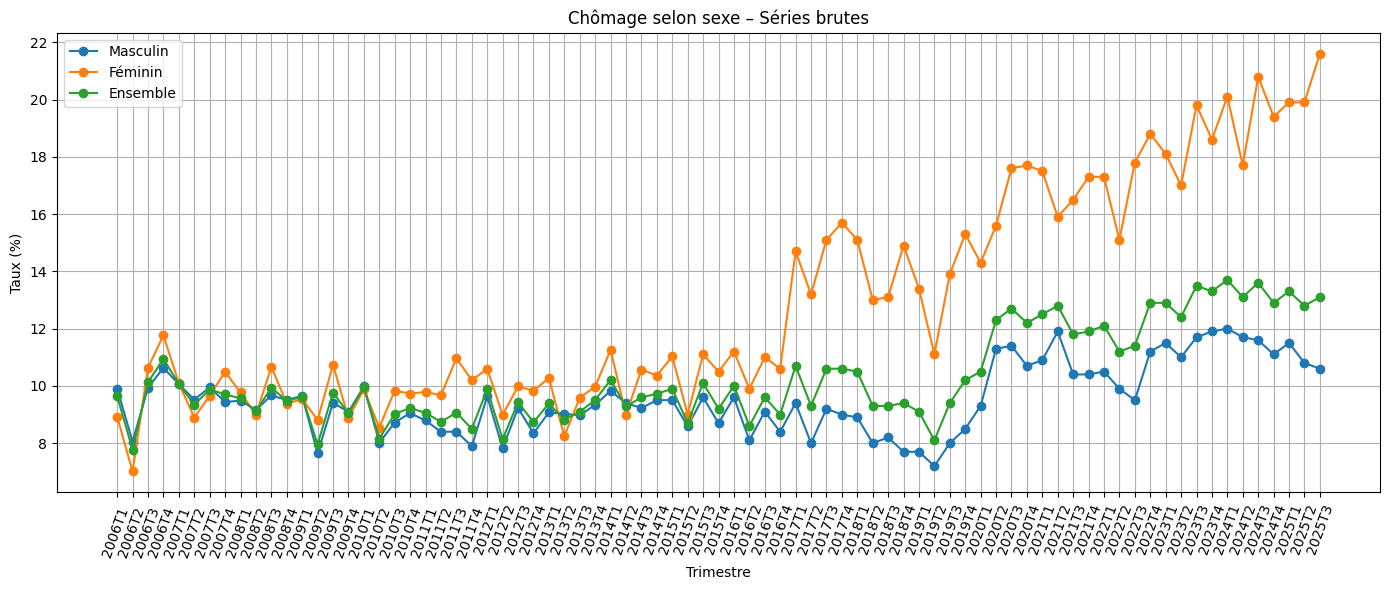

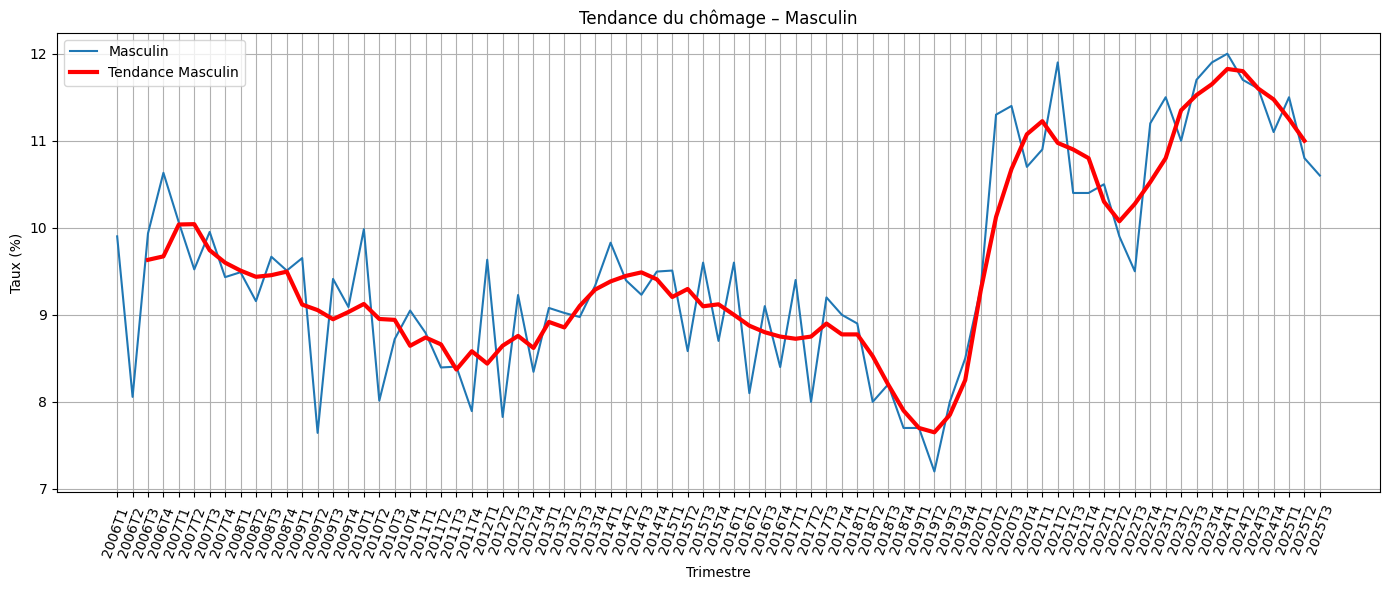

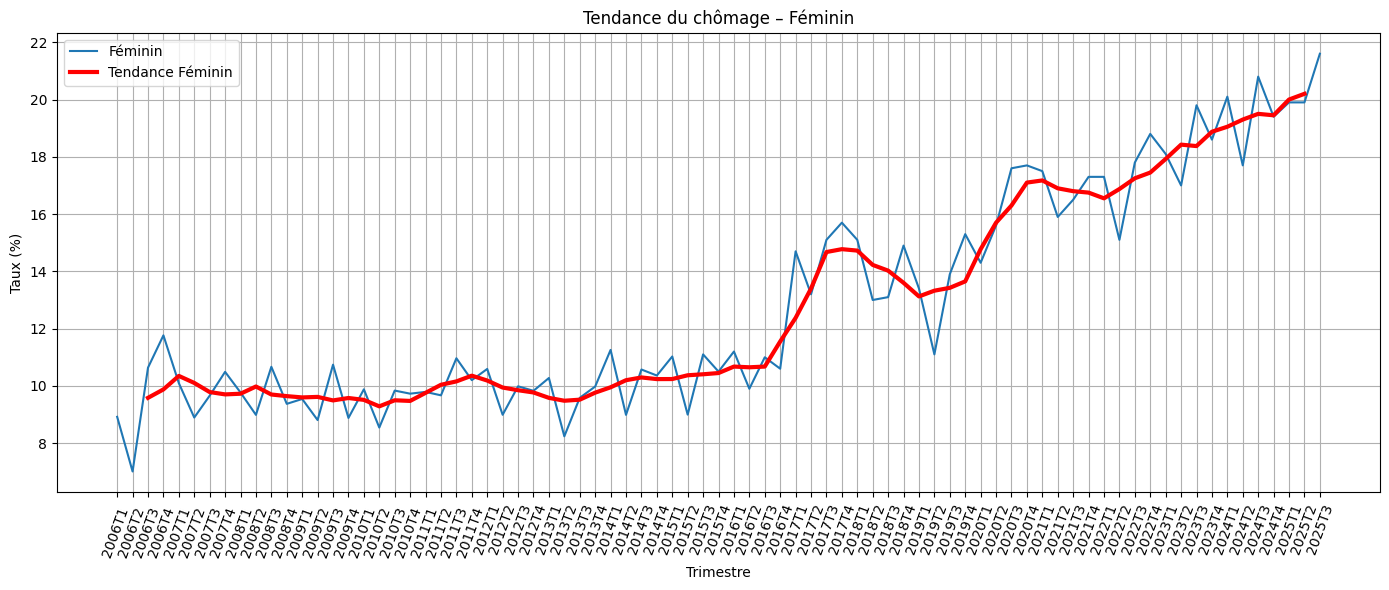

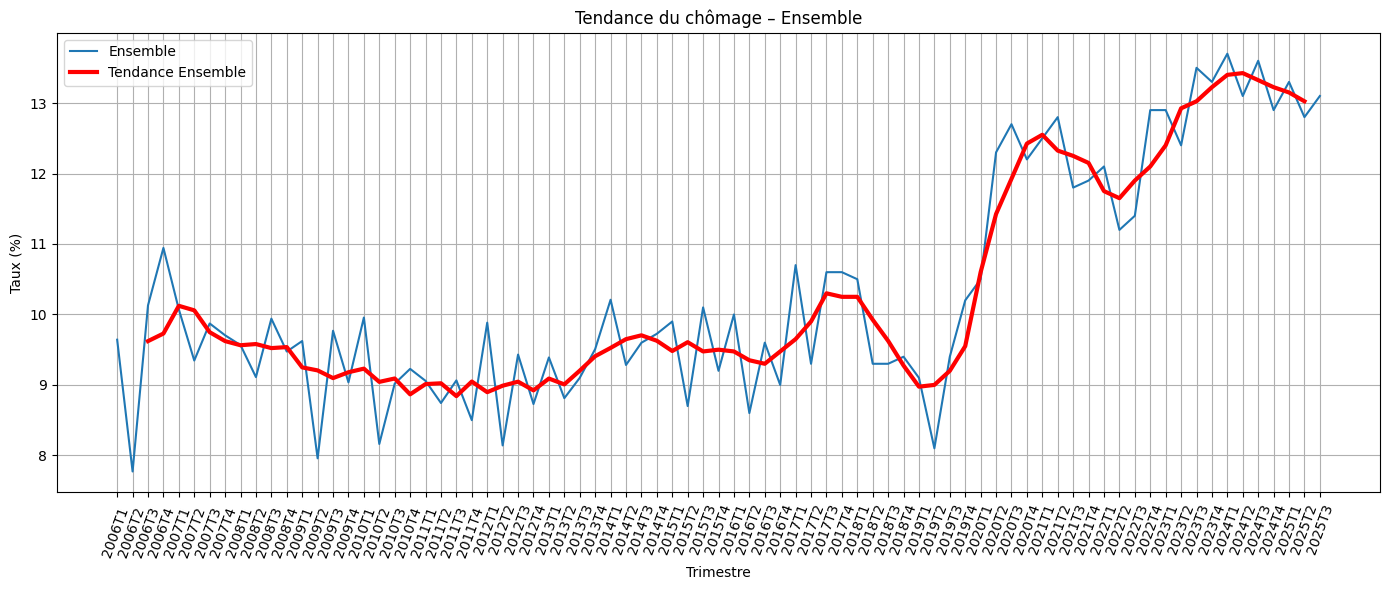

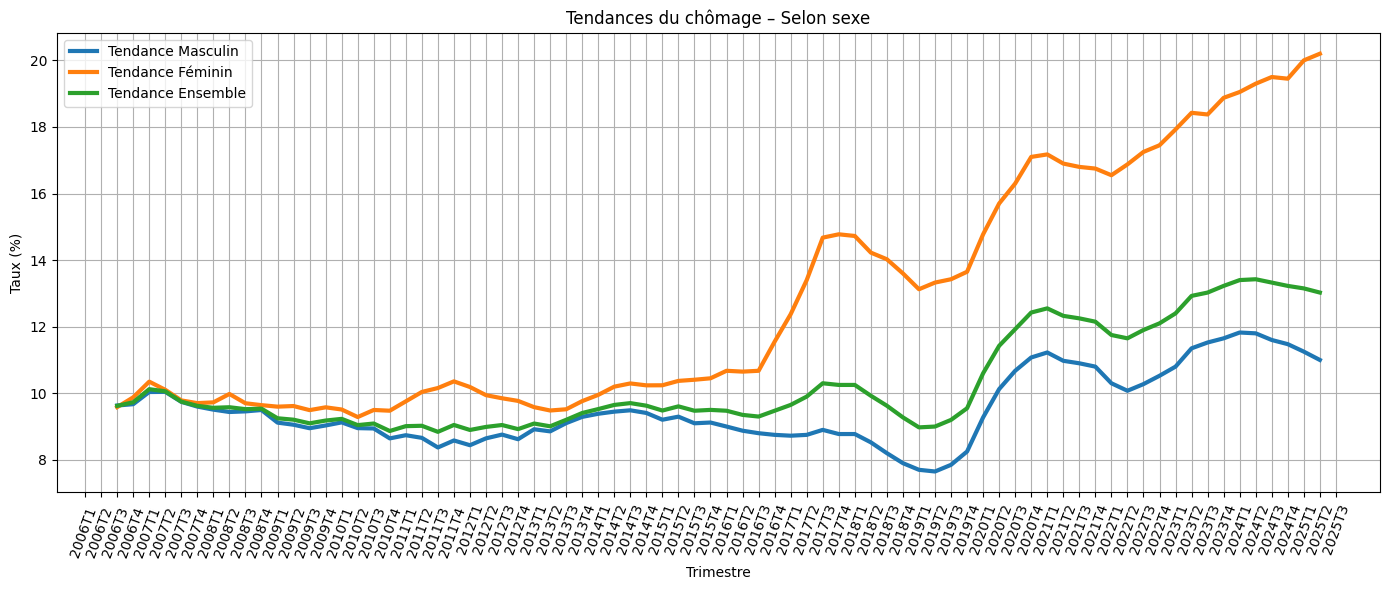

In [7]:
import matplotlib.pyplot as plt

# --- Nettoyage du DataFrame (sécurité) ---
df = df_sexe.copy()
df.columns = df.columns.str.replace('\xa0', '', regex=False).str.strip()

# Colonnes logiques du dataframe
cols = ["Masculin", "Féminin", "Ensemble"]

# --- Calcul de la tendance (moyenne mobile sur 4 trimestres) ---
for col in cols:
    df[f"Tendance_{col}"] = df[col].rolling(window=4, center=True).mean()

# ==========================================================
# 1️⃣ GRAPHIQUE GLOBAL – Séries brutes
# ==========================================================
plt.figure(figsize=(14,6))
for col in cols:
    plt.plot(df["Trimestre"], df[col], marker='o', label=col)

plt.xticks(rotation=70)
plt.title("Chômage selon sexe – Séries brutes")
plt.xlabel("Trimestre")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==========================================================
# 2️⃣ GRAPHIQUES INDIVIDUELS – Valeur + Tendance
# ==========================================================
for col in cols:
    plt.figure(figsize=(14,6))
    plt.plot(df["Trimestre"], df[col], label=col)
    plt.plot(df["Trimestre"], df[f"Tendance_{col}"], 
             linewidth=3, color="red", label=f"Tendance {col}")
    
    plt.xticks(rotation=70)
    plt.title(f"Tendance du chômage – {col}")
    plt.xlabel("Trimestre")
    plt.ylabel("Taux (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================================
# 3️⃣ GRAPHIQUE TENDANCES SEULEMENT
# ==========================================================
plt.figure(figsize=(14,6))
for col in cols:
    plt.plot(df["Trimestre"], df[f"Tendance_{col}"], linewidth=3, label=f"Tendance {col}")

plt.xticks(rotation=70)
plt.title("Tendances du chômage – Selon sexe")
plt.xlabel("Trimestre")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Analyse selon la tranche d’âge

**Catégories étudiées :**
- 15–24 ans
- 25–34 ans
- 35–44 ans
- 45 ans et plus
- Ensemble

**Méthodologie :**
1. Tracé des taux de chômage trimestriels pour chaque tranche d’âge.
2. Calcul de la tendance avec une moyenne mobile centrée sur 4 trimestres.
3. Visualisation :
   - Graphique global comparant toutes les tranches d’âge.
   - Graphiques individuels pour chaque tranche avec tendance.
   - Graphique comparatif des tendances uniquement.

**Objectif :** Identifier les tranches d’âge les plus touchées par le chômage et suivre les évolutions sur la période étudiée.

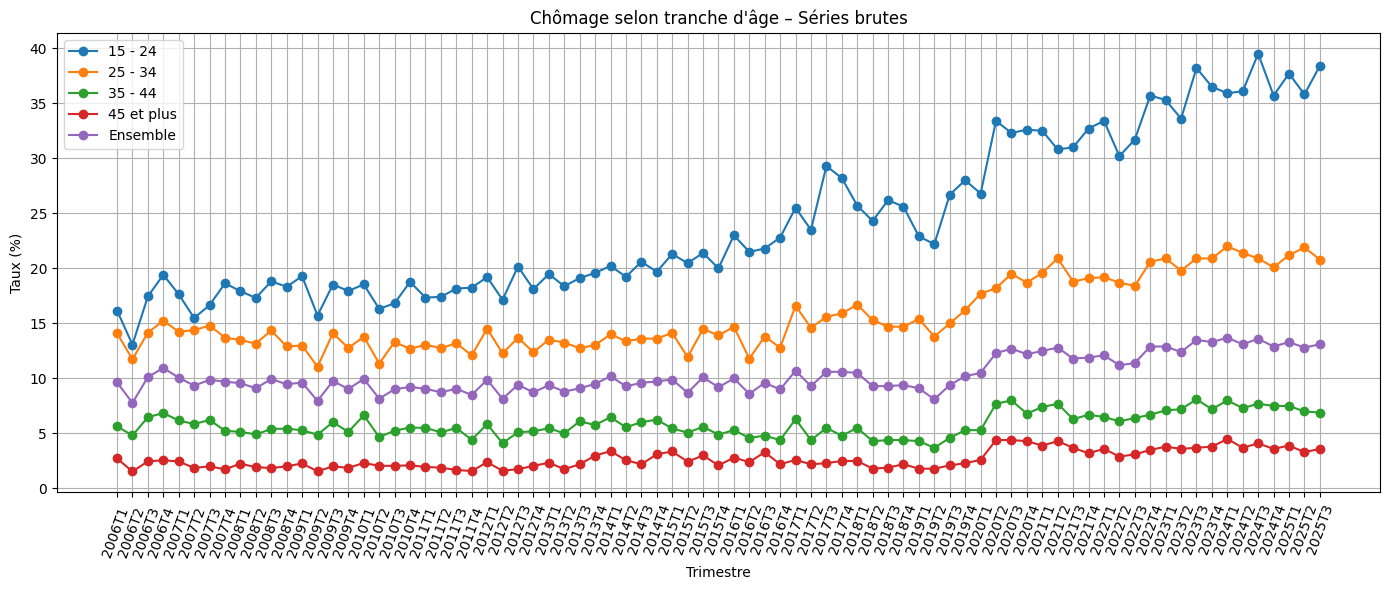

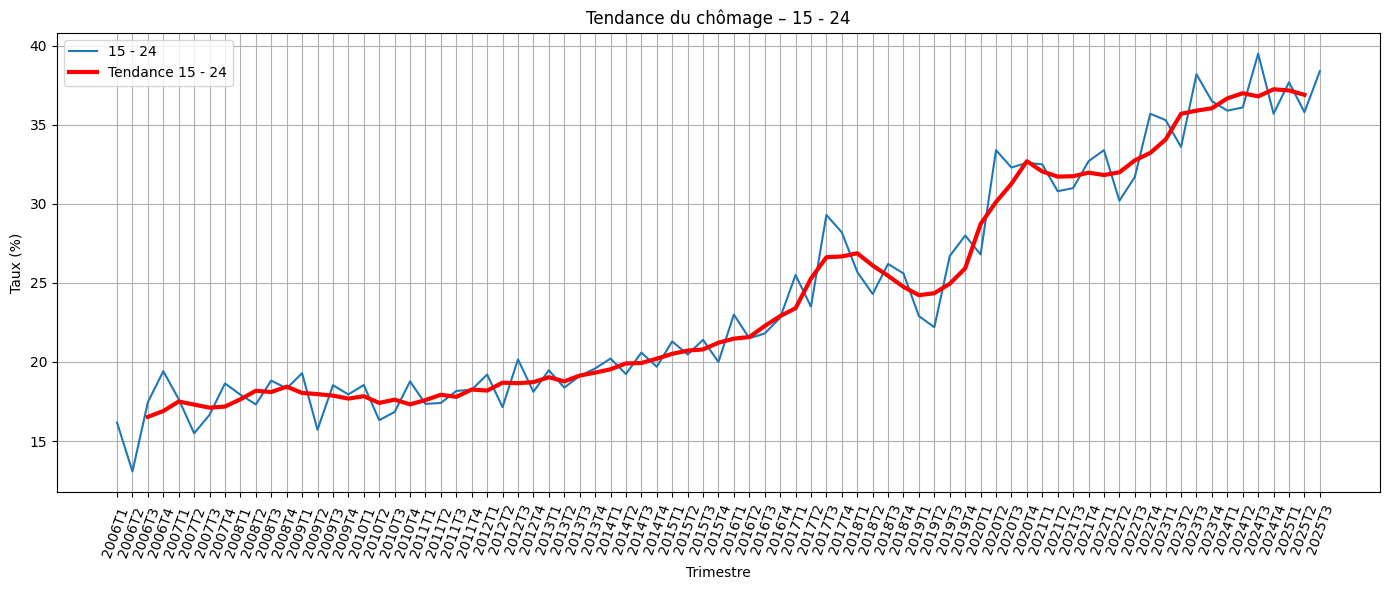

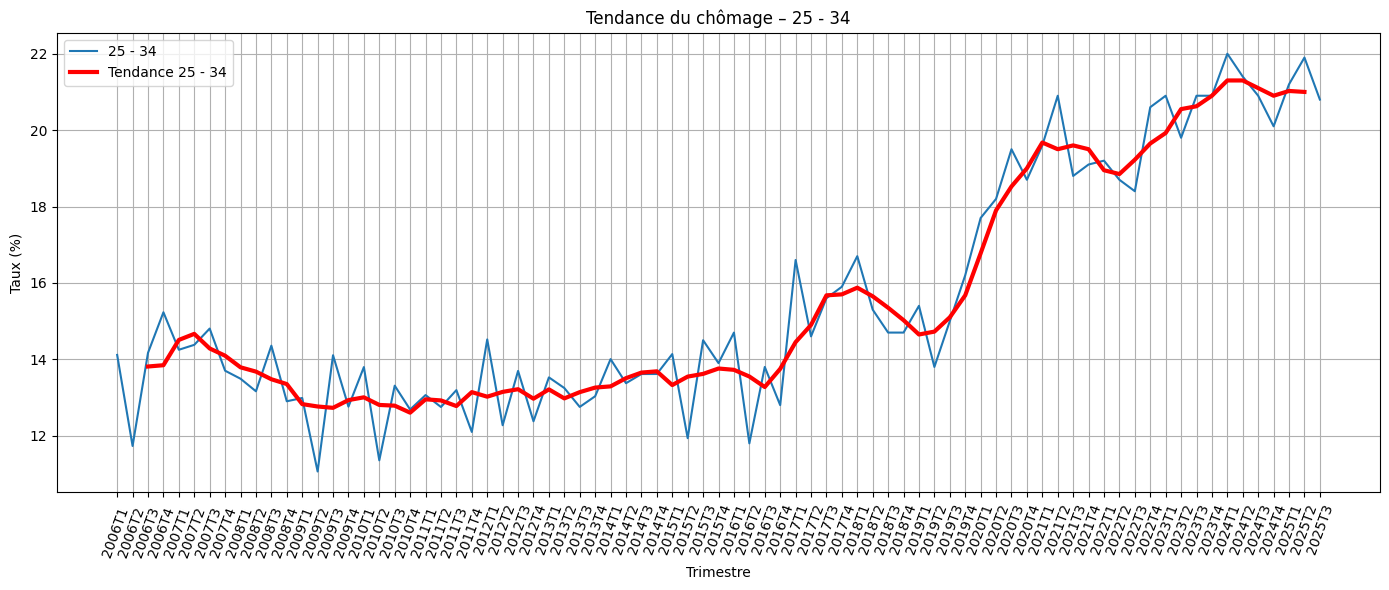

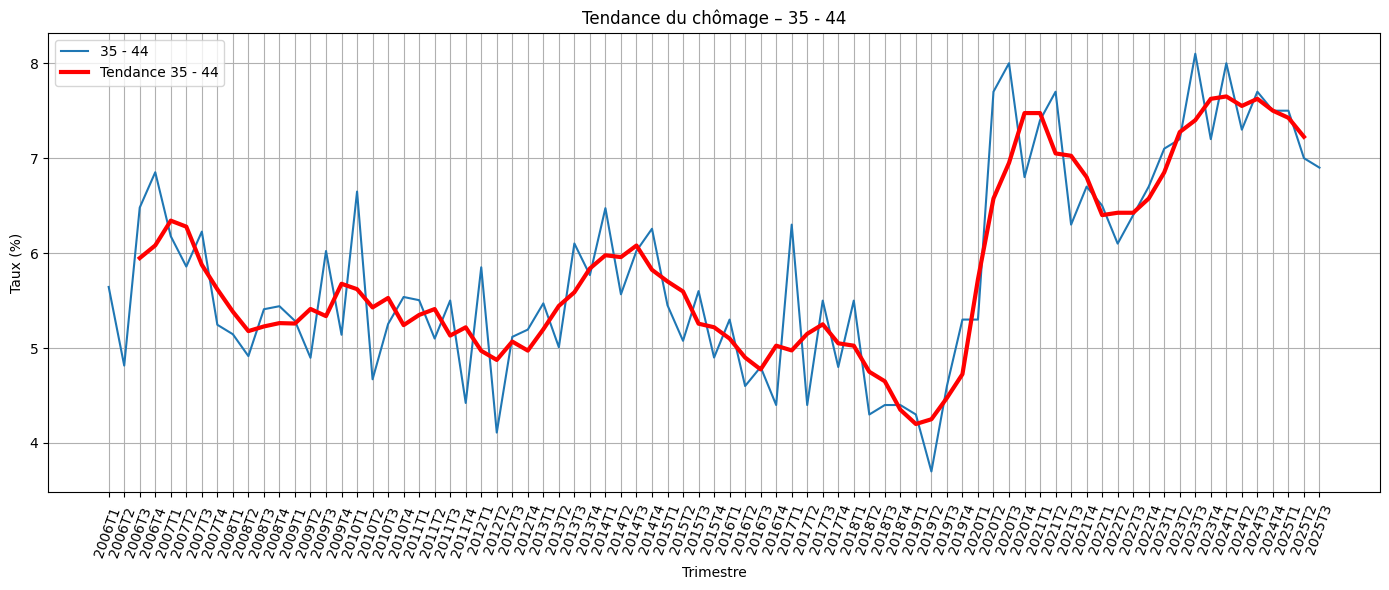

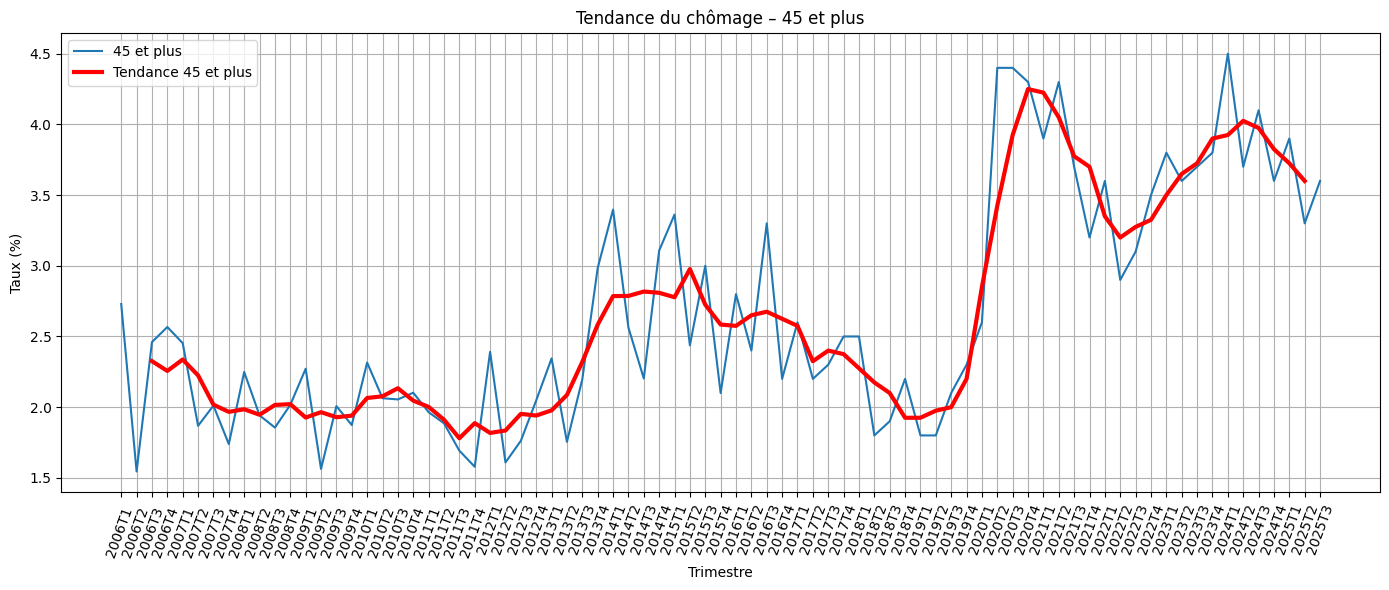

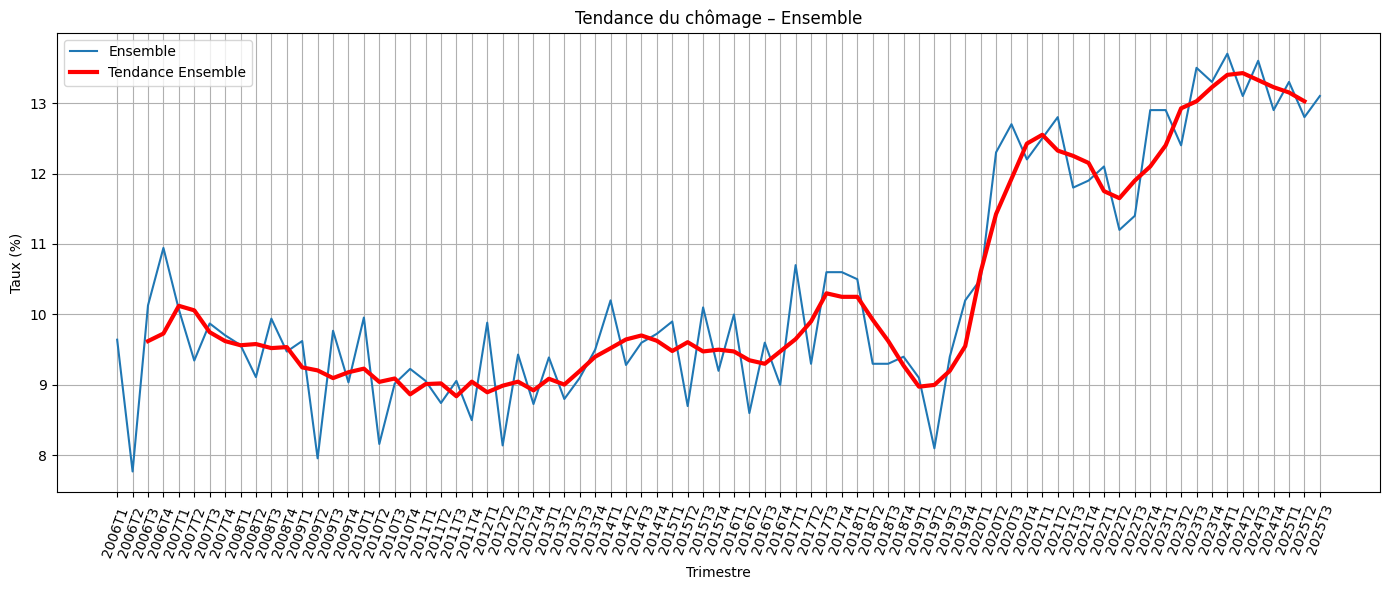

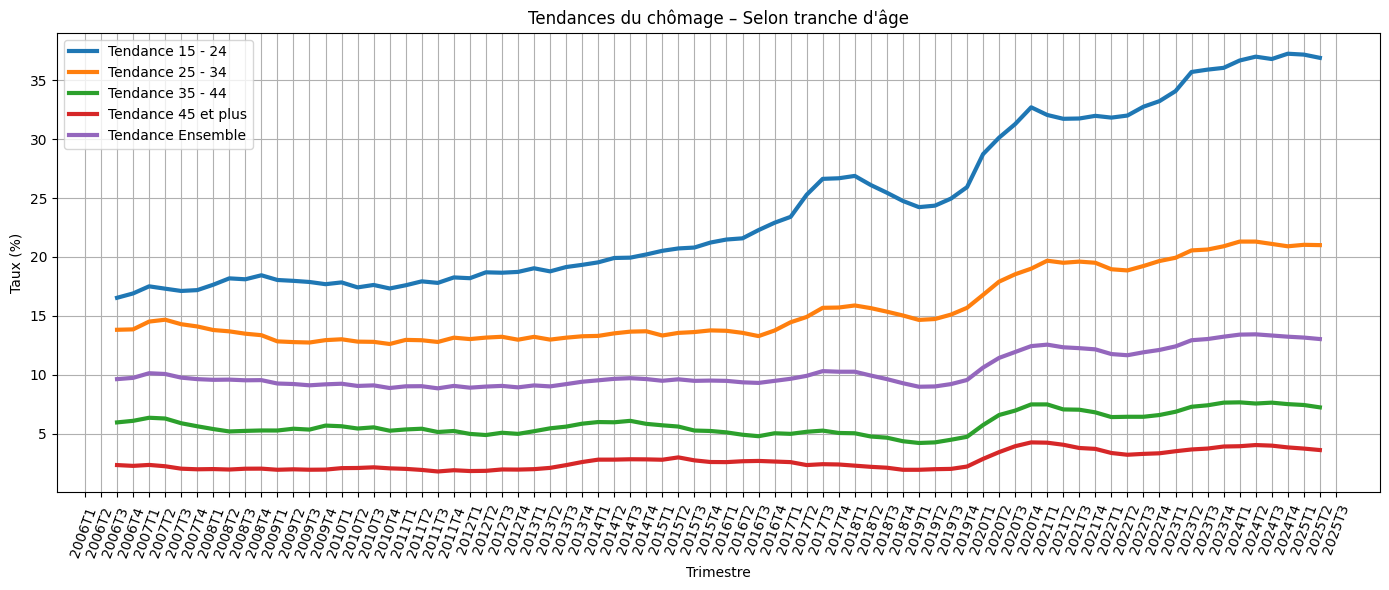

In [8]:
import matplotlib.pyplot as plt

# --- Nettoyage des noms de colonnes ---
df = df_tranche_age.copy()
df.columns = df.columns.str.replace('\xa0', '', regex=False).str.strip()

# Colonnes à utiliser
cols = ['15 - 24', '25 - 34', '35 - 44', '45 et plus', 'Ensemble']

# --- Calcul des tendances (moyenne mobile 4 trimestres) ---
for col in cols:
    df[f"Tendance_{col}"] = df[col].rolling(window=4, center=True).mean()

# ==========================================================
# 1️⃣ GRAPHIQUE GLOBAL – Séries brutes
# ==========================================================
plt.figure(figsize=(14,6))
for col in cols:
    plt.plot(df["Trimestres"], df[col], marker='o', label=col)

plt.xticks(rotation=70)
plt.title("Chômage selon tranche d'âge – Séries brutes")
plt.xlabel("Trimestre")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==========================================================
# 2️⃣ GRAPHIQUES INDIVIDUELS – Valeurs + Tendance
# ==========================================================
for col in cols:
    plt.figure(figsize=(14,6))
    plt.plot(df["Trimestres"], df[col], label=col)
    plt.plot(df["Trimestres"], df[f"Tendance_{col}"], linewidth=3,
             color="red", label=f"Tendance {col}")
    
    plt.xticks(rotation=70)
    plt.title(f"Tendance du chômage – {col}")
    plt.xlabel("Trimestre")
    plt.ylabel("Taux (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================================
# 3️⃣ GRAPHIQUE TENDANCES SEULEMENT
# ==========================================================
plt.figure(figsize=(14,6))
for col in cols:
    plt.plot(df["Trimestres"], df[f"Tendance_{col}"], linewidth=3, label=f"Tendance {col}")

plt.xticks(rotation=70)
plt.title("Tendances du chômage – Selon tranche d'âge")
plt.xlabel("Trimestre")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## la vérification du type de modèle (additif ou multiplicatif)

Dans cette section, nous comparons la **série du chômage national (`Ensemble`)** à sa **tendance calculée** à l'aide d'une moyenne mobile.  
Nous calculons deux types d'écarts :  

- **Additif** : différence entre la série et la tendance  
- **Multiplicatif** : ratio entre la série et la tendance  

Le graphique ci-dessous permet de visualiser ces écarts afin d’identifier si les variations sont principalement constantes (additives) ou proportionnelles (multiplicatives).



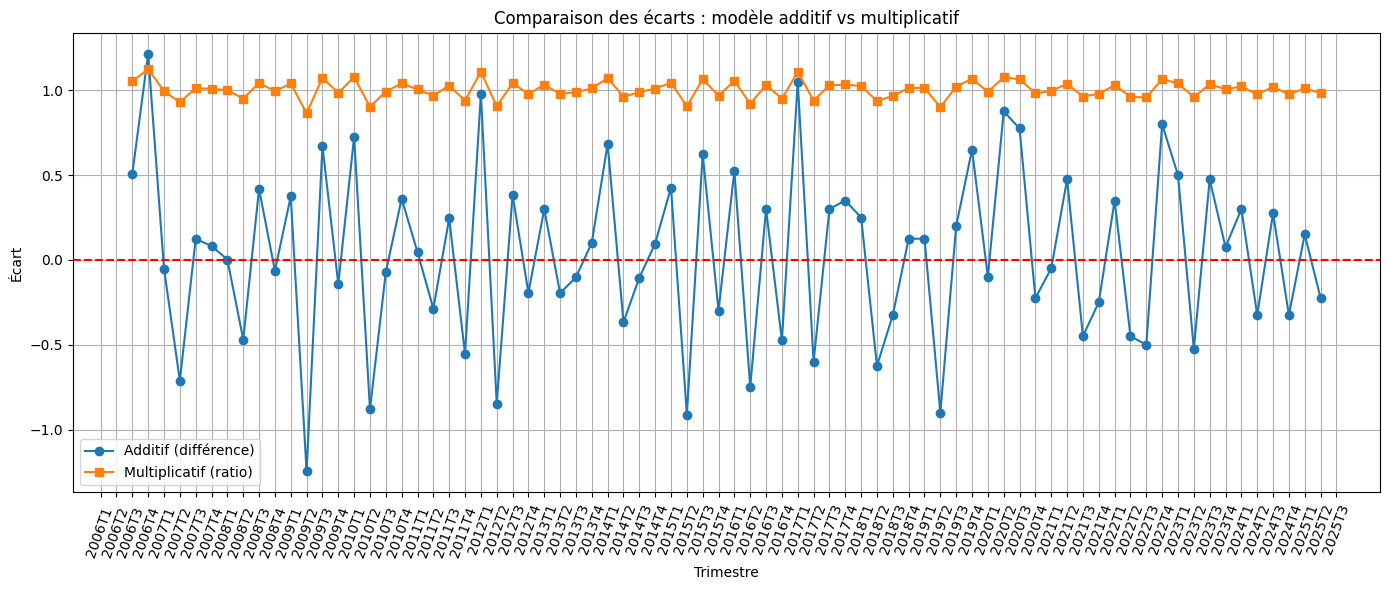

In [9]:
# Écart additif : différence entre la série et la tendance
ecart_additif = df_milieu['Ensemble'] - df_milieu['Tendance_Ensemble']

# Écart multiplicatif : ratio entre la série et la tendance
ecart_multiplicatif = df_milieu['Ensemble'] / df_milieu['Tendance_Ensemble']

# Tracé des écarts pour comparaison
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], ecart_additif, marker='o', label='Additif (différence)')
plt.plot(df_milieu['Trimestre'], ecart_multiplicatif, marker='s', label='Multiplicatif (ratio)')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=70)
plt.title("Comparaison des écarts : modèle additif vs multiplicatif")
plt.xlabel("Trimestre")
plt.ylabel("Écart")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Analyse du type de modèle pour la série temporelle « Ensemble »

Pour déterminer si la série suit un modèle additif ou multiplicatif, nous avons comparé les écarts absolus et relatifs par rapport à la tendance calculée.

- **Écarts absolus** (`X_t - Tendance_t`) : varient de manière significative dans le temps.  
- **Écarts relatifs** (`X_t / Tendance_t`) : restent relativement stables autour de 1.

> Cette observation indique que l'amplitude des variations saisonnières augmente avec le niveau de la série, ce qui est caractéristique d'un **modèle multiplicatif**.

**Conclusion :**  
La série temporelle « Ensemble » suit donc un **modèle multiplicatif**, et les prévisions futures seront modélisées en conséquence.


## Analyse de la composante saisonnière multiplicative

Dans cette section, nous extrayons la **composante saisonnière** de la série du chômage national (`Ensemble`) en utilisant le modèle multiplicatif.  

Le graphique ci-dessous visualise cette composante, centrée autour de 0, pour identifier les variations saisonnières tout au long de la série.

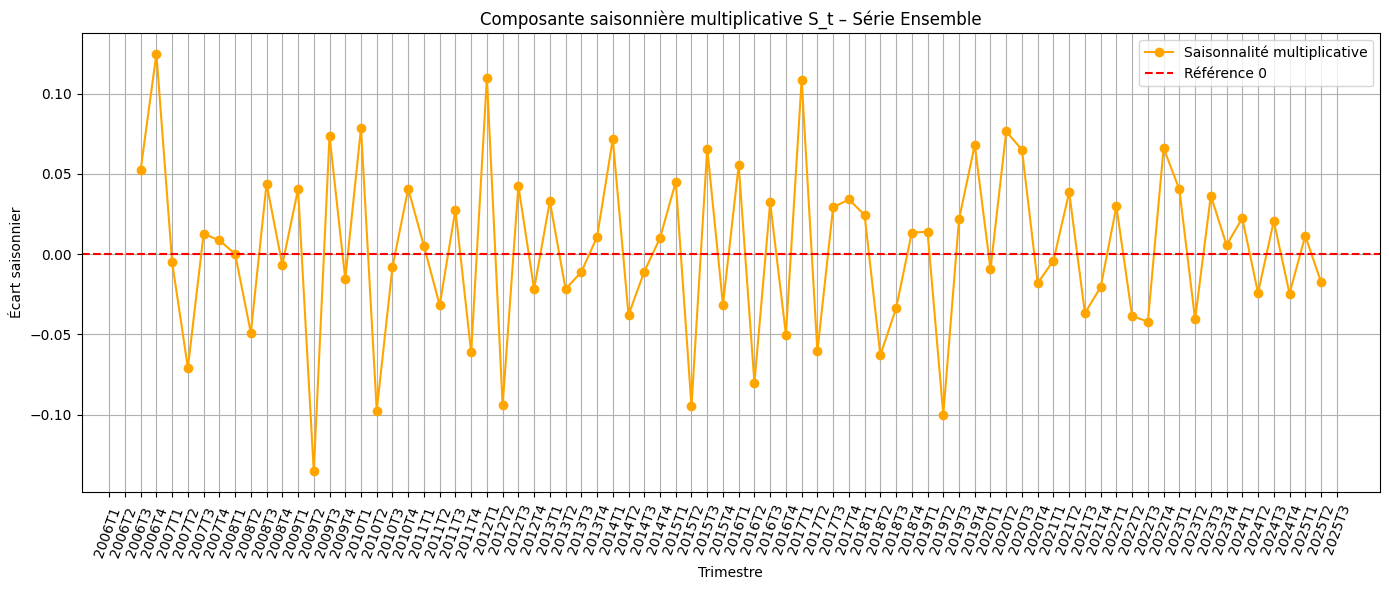

In [10]:
import matplotlib.pyplot as plt

# Calcul de la composante saisonnière multiplicative (centrée autour de 0)
df_milieu['Saisonnalite'] = df_milieu['Ensemble'] / df_milieu['Tendance_Ensemble'] - 1

# Tracé de la composante saisonnière
plt.figure(figsize=(14,6))
plt.plot(df_milieu['Trimestre'], df_milieu['Saisonnalite'], marker='o', color='orange', label='Saisonnalité multiplicative')
plt.axhline(0, color='red', linestyle='--', label='Référence 0')
plt.xticks(rotation=70)
plt.title("Composante saisonnière multiplicative S_t – Série Ensemble")
plt.xlabel("Trimestre")
plt.ylabel("Écart saisonnier")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Le graphique de la composante saisonnière multiplicative ($S_t - 1$) confirme l'existence d'une forte saisonnalité dans la série 'Ensemble'. On observe une périodicité claire, avec des cycles d'écarts saisonniers positifs et négatifs qui se répètent approximativement tous les quatre trimestres (c'est-à-dire annuellement). Cependant, l'amplitude de ces écarts (l'intensité des pics et des creux) semble fluctuer de manière significative au cours du temps, ce qui suggère une saisonnalité évolutive ou instable.

## Test de stationnarité – Augmented Dickey-Fuller (ADF)

Avant de modéliser une série temporelle, il est important de vérifier si elle est **stationnaire**.  
Ici, nous appliquons le **test ADF (Augmented Dickey-Fuller)** sur la série nationale du chômage (`Ensemble`) afin de déterminer si ses propriétés statistiques (moyenne, variance) sont constantes dans le temps.

- **Hypothèse nulle (H0)** : La série n'est pas stationnaire  
- **Hypothèse alternative (H1)** : La série est stationnaire

In [11]:
from statsmodels.tsa.stattools import adfuller

# Supprimer les valeurs manquantes si nécessaire
serie = df_milieu['Ensemble'].dropna()
# Test ADF
result = adfuller(serie)

print("Résultat du test ADF pour la série 'Ensemble' :")
print(f"ADF Statistic : {result[0]:.4f}")
print(f"p-value : {result[1]:.4f}")
print(f"Nombre de lags utilisés : {result[2]}")
print(f"Nombre d'observations utilisées : {result[3]}")
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key} : {value:.4f}")

# Interprétation
if result[1] < 0.05:
    print("\n=> La série est stationnaire (p-value < 0.05)")
else:
    print("\n=> La série n'est pas stationnaire (p-value ≥ 0.05)")

Résultat du test ADF pour la série 'Ensemble' :
ADF Statistic : 0.7066
p-value : 0.9900
Nombre de lags utilisés : 8
Nombre d'observations utilisées : 70
Valeurs critiques :
   1% : -3.5274
   5% : -2.9038
   10% : -2.5893

=> La série n'est pas stationnaire (p-value ≥ 0.05)


## Différenciation d'ordre 1 et test de stationnarité

Si la série initiale n’est pas stationnaire, une **différenciation d’ordre 1** peut être appliquée pour stabiliser la moyenne.  
Nous calculons la différence entre chaque trimestre consécutif de la série nationale du chômage (`Ensemble`) et effectuons à nouveau le **test ADF** pour vérifier la stationnarité.

In [12]:
# Différence d'ordre 1
df_milieu['Ensemble_diff1'] = df_milieu['Ensemble'].diff()

# Supprimer la première valeur NaN créée par diff()
serie_diff1 = df_milieu['Ensemble_diff1'].dropna()

# Refaire le test ADF sur la série différenciée
from statsmodels.tsa.stattools import adfuller
result_diff1 = adfuller(serie_diff1)

print("Test ADF après différenciation d'ordre 1 :")
print(f"ADF Statistic : {result_diff1[0]:.4f}")
print(f"p-value : {result_diff1[1]:.4f}")

if result_diff1[1] < 0.05:
    print("=> La série différenciée est maintenant stationnaire")
else:
    print("=> La série différenciée n'est toujours pas stationnaire")


Test ADF après différenciation d'ordre 1 :
ADF Statistic : -4.8891
p-value : 0.0000
=> La série différenciée est maintenant stationnaire


## Sélection automatique du meilleur modèle ARIMA

Pour la prévision de la série du chômage national (`Ensemble`), nous utilisons la fonction **`auto_arima`** de la bibliothèque `pmdarima`.  
Cette méthode permet de **tester plusieurs combinaisons de paramètres (p, d, q)** et de sélectionner automatiquement le modèle ARIMA le plus approprié en fonction des critères d’information (AIC/BIC).

In [13]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.0/698.0 kB 11.3 MB/s eta 0:00:00a 0:00:01


In [14]:
import pandas as pd
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# La série
serie = df_milieu['Ensemble']

# Recherche automatique du meilleur modèle ARIMA
model_auto = auto_arima(
    serie,
    seasonal=False,   # mettre True si série saisonnière
    stepwise=True,
    suppress_warnings=True,
    trace=True        # affiche les essais de modèles
)

# Affichage du résumé du meilleur modèle
print(model_auto.summary())

# Extraction des paramètres
p, d, q = model_auto.order
print(f"Paramètres ARIMA choisis : p={p}, d={d}, q={q}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=180.552, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=211.053, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=186.325, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=189.273, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=209.237, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=179.261, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=188.839, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=188.220, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=180.928, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=190.884, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=181.328, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=178.298, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=187.672, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=187.142, 

## Ajustement du modèle ARIMA sur la série

Après avoir sélectionné les paramètres optimaux `(p, d, q)` avec `auto_arima`, nous ajustons le modèle **ARIMA** sur la série du chômage national (`Ensemble`).  
Le résumé du modèle permet de visualiser les coefficients estimés et les statistiques associées.


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustement du modèle ARIMA
model = ARIMA(serie, order=(p, d, q))
model_fit = model.fit()

# Affichage du résumé du modèle
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Ensemble   No. Observations:                   79
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -85.149
Date:                Fri, 05 Dec 2025   AIC                            178.298
Time:                        19:38:56   BIC                            187.725
Sample:                             0   HQIC                           182.072
                                 - 79                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9949      0.011    -94.383      0.000      -1.016      -0.974
ma.L1          0.5719      0.112      5.112      0.000       0.353       0.791
ma.L2         -0.3540      0.124     -2.850      0.0

## Prévision des prochaines périodes avec ARIMA

Une fois le modèle ARIMA ajusté, nous pouvons utiliser celui-ci pour **prévoir les taux de chômage des 4 prochains trimestres**.  
Cette étape permet d’anticiper l’évolution de la série et d’aider à la planification économique.

In [16]:
# Prévision des 4 prochaines périodes
forecast = model_fit.forecast(steps=4)
print("Prévisions pour les 4 prochaines périodes:" )
print(forecast)

Prévisions pour les 4 prochaines périodes:
79    12.825098
80    13.130298
81    12.826646
82    13.128758
Name: predicted_mean, dtype: float64


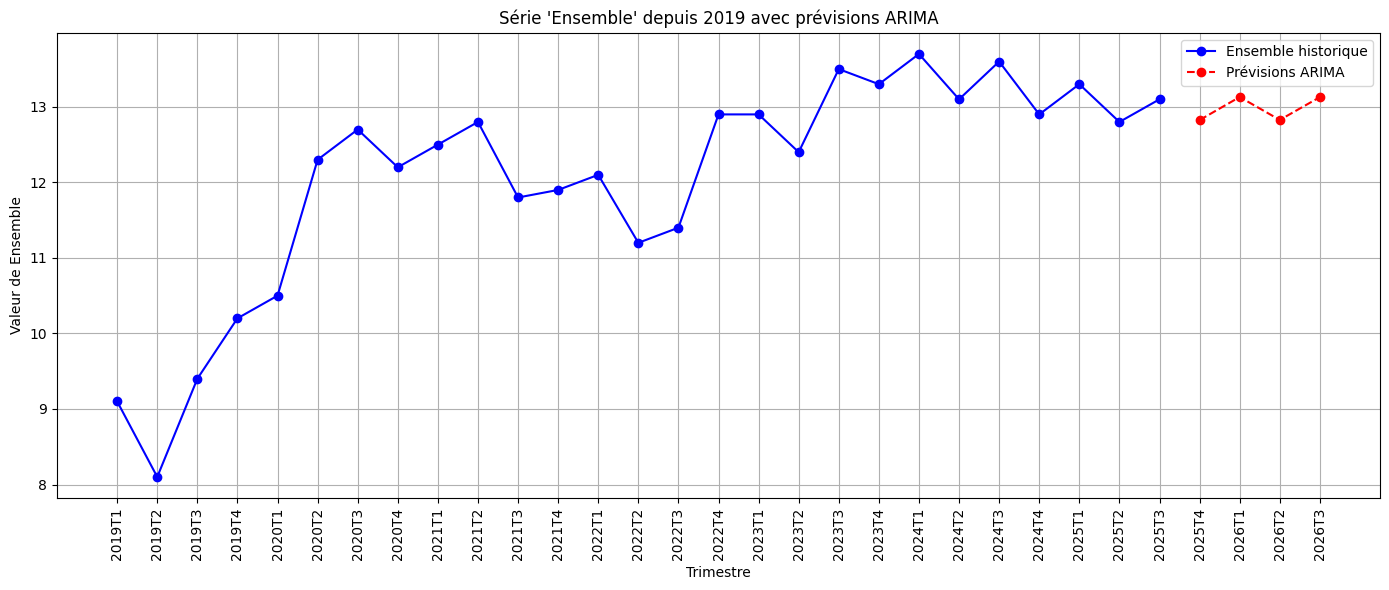

In [17]:
import matplotlib.pyplot as plt
import re
import pandas as pd

# Filtrer la série depuis 2019 pour le graphique
df_plot = df_milieu[df_milieu['Trimestre'] >= '2019T1']

# Nombre de trimestres à prévoir
steps = 4

# Créer un index pour les périodes futures
last_date = df_plot['Trimestre'].iloc[-1]

def next_quarters(last, n):
    year, q = map(int, re.findall(r'\d+', last))
    quarters = []
    for _ in range(n):
        q += 1
        if q > 4:
            q = 1
            year += 1
        quarters.append(f"{year}T{q}")
    return quarters

future_quarters = next_quarters(last_date, steps)

# Combiner trimestres historiques et futurs
all_quarters = list(df_plot['Trimestre']) + future_quarters

# Combiner valeurs historiques et prévisions
ensemble_all = list(df_plot['Ensemble']) + list(forecast)

# Tracer le graphique
plt.figure(figsize=(14,6))

# Série historique
plt.plot(df_plot['Trimestre'], df_plot['Ensemble'], marker='o', color='blue', label='Ensemble historique')

# Prévisions ARIMA
plt.plot(future_quarters, forecast, marker='o', color='red', linestyle='--', label='Prévisions ARIMA')

plt.xticks(rotation=90)
plt.title("Série 'Ensemble' depuis 2019 avec prévisions ARIMA")
plt.xlabel("Trimestre")
plt.ylabel("Valeur de Ensemble")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Prédiction du taux de chômage avec un RNN

Dans cette section, nous utilisons un **RNN (Simple Recurrent Neural Network)** pour prédire le taux de chômage national (`Ensemble`) au Maroc.  

Le processus comprend :  

1. **Préparation des données** :  
   - Extraction de la série historique.  
   - Normalisation des données avec `MinMaxScaler`.  
   - Création de **fenêtres glissantes** (ici, 4 trimestres pour prédire le suivant).

2. **Création du RNN** :  
   - Modèle `Sequential` avec une couche `SimpleRNN` et une couche dense de sortie.  
   - Fonction de perte : MSE, optimiseur : Adam.

3. **Entraînement du RNN** :  
   - Sur toutes les fenêtres glissantes de la série, avec 200 epochs.

4. **Prédictions** :  
   - Prédiction sur la série complète pour visualisation.  
   - Prévision des **4 prochains trimestres** en mettant à jour la fenêtre glissante à chaque prédiction.

Ce modèle permet de capturer la **dynamique temporelle** de la série et de générer des prévisions à court terme.


In [18]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Désactive le GPU
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'   # Supprime la plupart des warnings TensorFlow


In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# =========================
# 1️⃣ Préparer les données
# =========================
serie = df_milieu['Ensemble'].values.reshape(-1,1)

# Normalisation pour RNN
scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie)

# Fenêtre glissante
window_size = 4  # utiliser les 4 trimestres précédents pour prédire le suivant
X, y = [], []
for i in range(len(serie_scaled)-window_size):
    X.append(serie_scaled[i:i+window_size])
    y.append(serie_scaled[i+window_size])

X, y = np.array(X), np.array(y)

# =========================
# 2️⃣ Créer le RNN
# =========================
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(window_size,1)))
model.add(Dense(1))  # sortie une valeur
model.compile(optimizer='adam', loss='mse')

# =========================
# 3️⃣ Entraîner le RNN
# =========================
model.fit(X, y, epochs=200, batch_size=1, verbose=0)

# =========================
# 4️⃣ Faire les prédictions
# =========================
# Prédiction sur la série complète
preds_scaled = model.predict(X)
preds = scaler.inverse_transform(preds_scaled)

# Prévision pour les 4 prochains trimestres
last_window = serie_scaled[-window_size:].reshape(1, window_size, 1)
forecast_rnn = []
for _ in range(4):
    pred_scaled = model.predict(last_window)
    pred = scaler.inverse_transform(pred_scaled)[0,0]
    forecast_rnn.append(pred)
    
    # Mettre à jour la fenêtre
    last_window = np.append(last_window[:,1:,:], pred_scaled.reshape(1,1,1), axis=1)



2025-12-05 19:38:58.383225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764963538.616158      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764963538.696746      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2025-12-05 19:39:16.139474: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


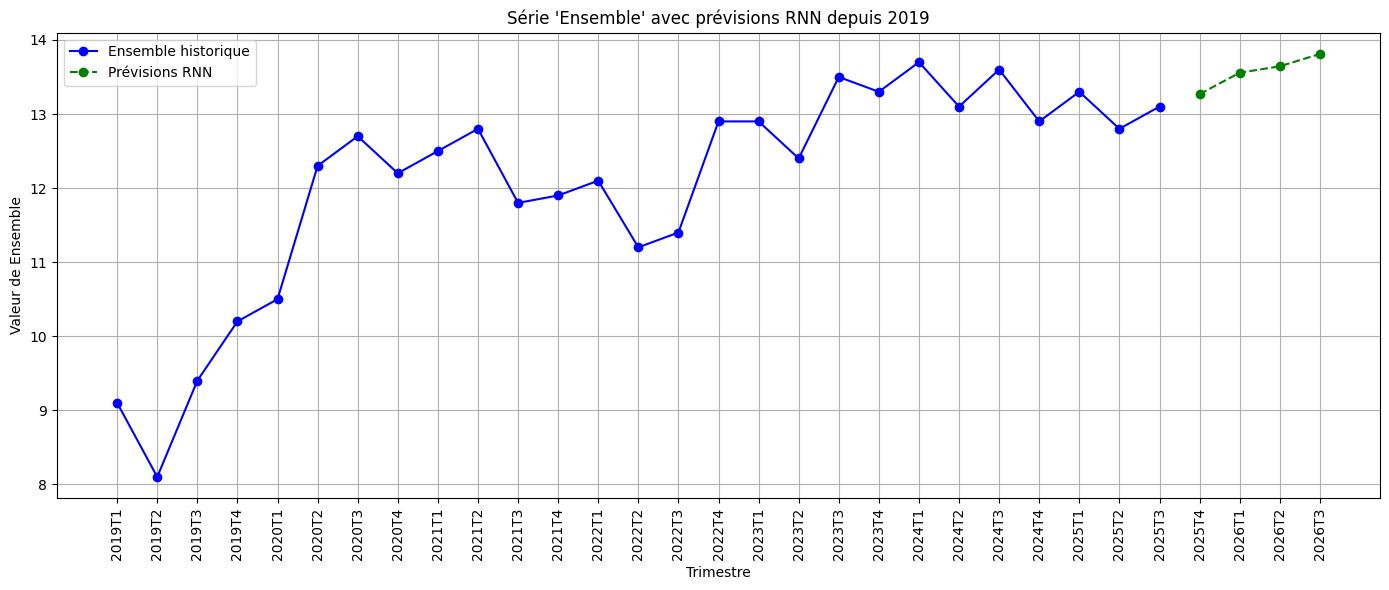

In [20]:
# =========================
# 5️⃣ Tracer le graphique comparatif
# =========================
# Générer les trimestres futurs
import re
last_date = df_milieu['Trimestre'].iloc[-1]
def next_quarters(last, n):
    year, q = map(int, re.findall(r'\d+', last))
    quarters = []
    for _ in range(n):
        q += 1
        if q > 4:
            q = 1
            year += 1
        quarters.append(f"{year}T{q}")
    return quarters

future_quarters = next_quarters(last_date, 4)
all_quarters = list(df_milieu['Trimestre']) + future_quarters

# -------------------------
# Combiner historique + prévisions
# -------------------------
ensemble_all_rnn = list(df_plot['Ensemble']) + forecast_rnn

# -------------------------
# Tracé du graphique
# -------------------------
plt.figure(figsize=(14,6))
plt.plot(df_plot['Trimestre'], df_plot['Ensemble'], marker='o', color='blue', label='Ensemble historique')
plt.plot(future_quarters, forecast_rnn, marker='o', linestyle='--', color='green', label='Prévisions RNN')

plt.xticks(rotation=90)
plt.title("Série 'Ensemble' avec prévisions RNN depuis 2019")
plt.xlabel("Trimestre")
plt.ylabel("Valeur de Ensemble")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Comparaison des prévisions ARIMA et RNN

Dans cette section, nous visualisons la **série historique du chômage national (`Ensemble`) depuis 2019** et comparons les prévisions générées par deux approches :  

- **ARIMA** : modèle statistique classique de séries temporelles.  
- **RNN** : réseau de neurones récurrent capturant la dynamique temporelle.

Le graphique permet de :  
1. Comparer la capacité de chaque modèle à suivre la série historique.  
2. Visualiser les prévisions pour les **4 prochains trimestres**.  
3. Identifier les différences potentielles entre les approches statistique et deep learning.


In [21]:
# Prévisions ARIMA
forecast_arima = model_fit.forecast(steps=4)
print("Prévisions ARIMA (valeurs numériques) :", list(forecast_arima))

# Prévisions RNN
print("Prévisions RNN (valeurs numériques) :", forecast_rnn)


Prévisions ARIMA (valeurs numériques) : [12.8250976965457, 13.130298033691474, 12.826645776652807, 13.128757805974178]
Prévisions RNN (valeurs numériques) : [13.26912, 13.557047, 13.644069, 13.810366]


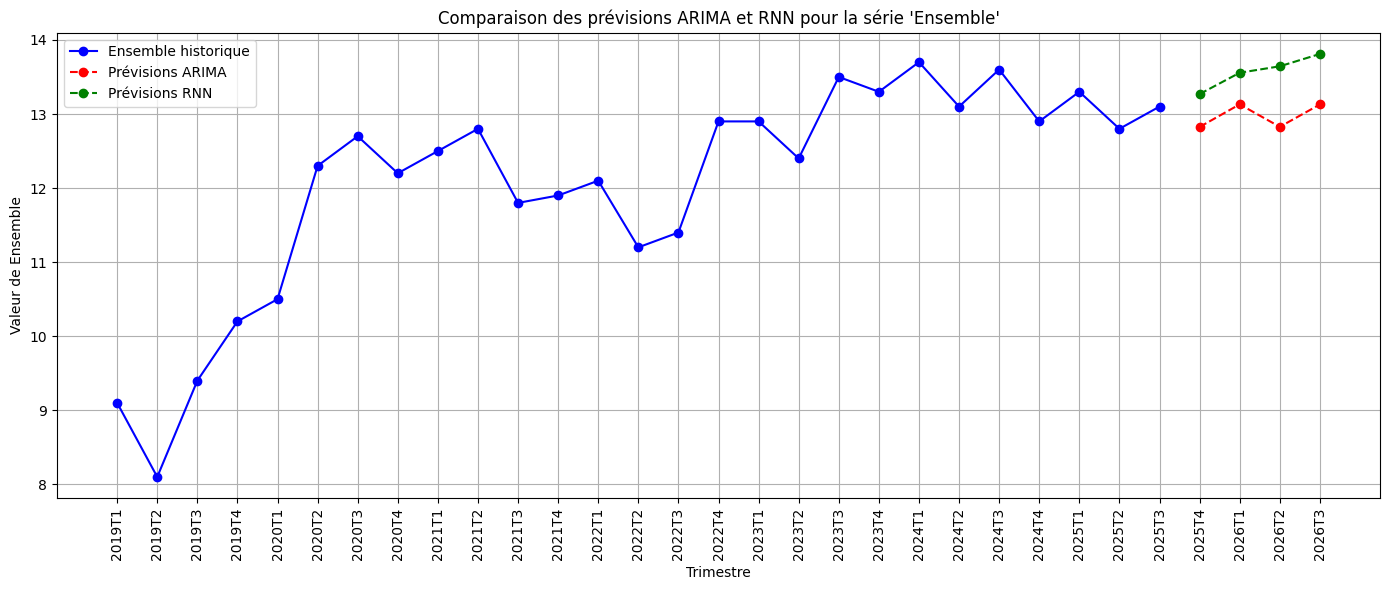

In [22]:
import matplotlib.pyplot as plt
import re

# Filtrer la série depuis 2019 pour le graphique
df_plot = df_milieu[df_milieu['Trimestre'] >= '2019T1']

# Générer les trimestres futurs
last_date = df_plot['Trimestre'].iloc[-1]
def next_quarters(last, n):
    year, q = map(int, re.findall(r'\d+', last))
    quarters = []
    for _ in range(n):
        q += 1
        if q > 4:
            q = 1
            year += 1
        quarters.append(f"{year}T{q}")
    return quarters

future_quarters = next_quarters(last_date, 4)

# Tracer le graphique
plt.figure(figsize=(14,6))

# Série historique
plt.plot(df_plot['Trimestre'], df_plot['Ensemble'], marker='o', color='blue', label='Ensemble historique')

# Prévisions ARIMA
plt.plot(future_quarters, forecast_arima, marker='o', linestyle='--', color='red', label='Prévisions ARIMA')

# Prévisions RNN
plt.plot(future_quarters, forecast_rnn, marker='o', linestyle='--', color='green', label='Prévisions RNN')

plt.xticks(rotation=90)
plt.title("Comparaison des prévisions ARIMA et RNN pour la série 'Ensemble'")
plt.xlabel("Trimestre")
plt.ylabel("Valeur de Ensemble")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Comparaison ARIMA vs RNN pour la prévision du chômage

Dans cette section, nous comparons deux approches pour prédire le **taux de chômage national (`Ensemble`)** :  

1. **Modèle ARIMA** (statistique) :  
   - Ici, un ARIMA(1,1,1) simple est utilisé sur la série d'entraînement (train) jusqu'à fin 2023.  
   - Les prévisions sont générées pour la période test (2024 et plus).

2. **RNN (Recurrent Neural Network)** (deep learning) :  
   - La série est normalisée avec `MinMaxScaler`.  
   - Fenêtre glissante de 4 trimestres pour prédire le suivant.  
   - Modèle `Sequential` avec `SimpleRNN` et couche dense de sortie.  
   - Entraînement sur la période train et prévisions pour la période test.

Le processus inclut :  
- Séparation des données train/test.  
- Prévisions ARIMA et RNN sur la période test.  
- Tracé comparatif historique vs prévisions.  
- Tableau des valeurs réelles et prévisions pour analyse.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# =========================
# 1️⃣ Préparer les données
# =========================

# Prendre la série complète
s = df_milieu['Ensemble'].values

# Découpage TRAIN jusqu'à fin 2023
df_train = df_milieu[df_milieu['Trimestre'] <= "2023T4"]
df_test  = df_milieu[df_milieu['Trimestre'] >  "2023T4"]

train = df_train['Ensemble'].values
test  = df_test['Ensemble'].values

# =========================
# 2️⃣ Modèle ARIMA entraîné sur train
# =========================

# Choix manuel simple ARIMA(1,1,1) (fiable pour tendances simples)
model_arima = ARIMA(train, order=(1,1,1))
fit_arima = model_arima.fit()

# Prévision sur la longueur du test
forecast_arima = fit_arima.forecast(steps=len(test))



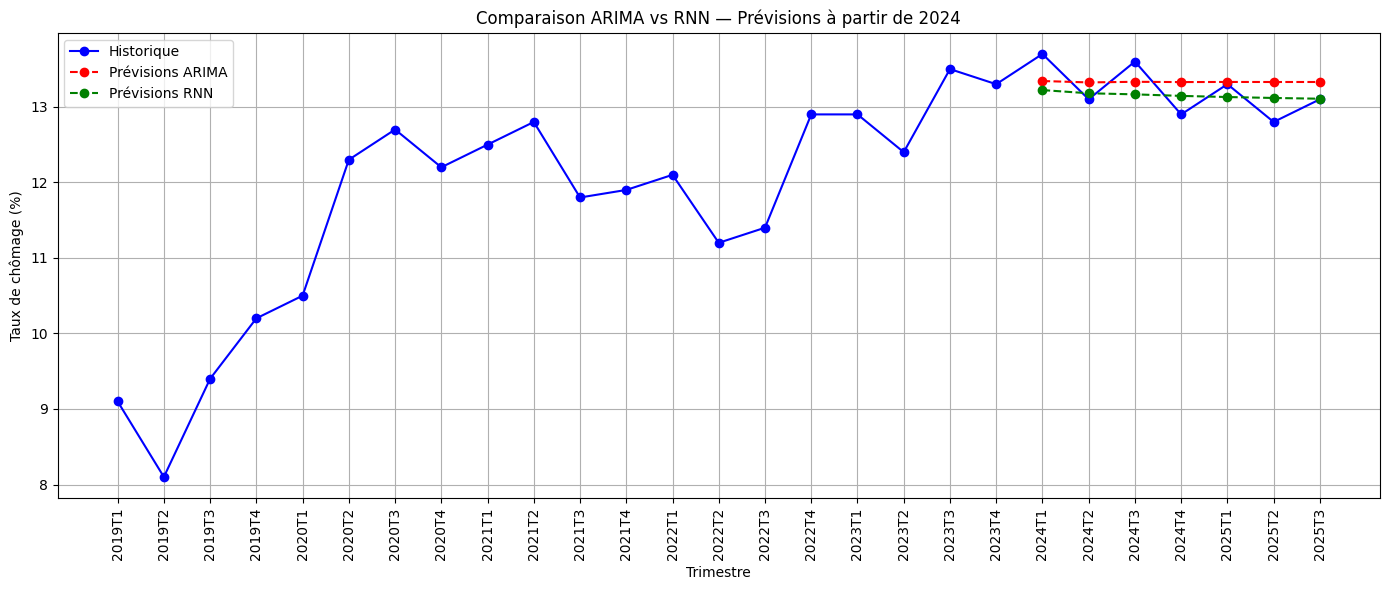

  Trimestre  Réel  Prévision_ARIMA  Prévision_RNN
0    2024T1  13.7        13.342116      13.222041
1    2024T2  13.1        13.323537      13.179863
2    2024T3  13.6        13.331733      13.165415
3    2024T4  12.9        13.328117      13.145145
4    2025T1  13.3        13.329712      13.130139
5    2025T2  12.8        13.329009      13.117698
6    2025T3  13.1        13.329319      13.107613


In [24]:
# =========================
# 3️⃣ Modèle RNN entraîné sur train
# =========================

# Normalisation
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1,1))

# Fenêtre glissante
window = 4
X, y = [], []
for i in range(len(train_scaled)-window):
    X.append(train_scaled[i:i+window])
    y.append(train_scaled[i+window])
X, y = np.array(X), np.array(y)

# Construction du modèle
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(window,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entraînement
model.fit(X, y, epochs=200, batch_size=1, verbose=0)

# Prévisions RNN sur la période test
last_window = train_scaled[-window:].reshape(1,window,1)
forecast_rnn = []

for _ in range(len(test)):
    pred_scaled = model.predict(last_window, verbose=0)
    pred = scaler.inverse_transform(pred_scaled)[0,0]
    forecast_rnn.append(pred)

    # mise à jour de la fenêtre
    last_window = np.append(last_window[:,1:,:], pred_scaled.reshape(1,1,1), axis=1)


# =========================
# 4️⃣ Graphique comparatif
# =========================

plt.figure(figsize=(14,6))

# Historique depuis 2019
df_plot = df_milieu[df_milieu['Trimestre'] >= "2019T1"]
plt.plot(df_plot['Trimestre'], df_plot['Ensemble'], marker='o', color='blue', label='Historique')

# ARIMA
plt.plot(df_test['Trimestre'], forecast_arima, marker='o', linestyle='--', color='red', label='Prévisions ARIMA')

# RNN
plt.plot(df_test['Trimestre'], forecast_rnn, marker='o', linestyle='--', color='green', label='Prévisions RNN')

plt.xticks(rotation=90)
plt.title("Comparaison ARIMA vs RNN — Prévisions à partir de 2024")
plt.xlabel("Trimestre")
plt.ylabel("Taux de chômage (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# 5️⃣ Afficher les prévisions
# =========================

res = pd.DataFrame({
    "Trimestre": df_test['Trimestre'].values,
    "Réel": test,
    "Prévision_ARIMA": forecast_arima,
    "Prévision_RNN": forecast_rnn
})

print(res)


## Évaluation des modèles ARIMA et RNN

Après avoir généré les prévisions pour la période test, nous comparons les deux modèles selon plusieurs métriques classiques de performance :  

- **RMSE (Root Mean Squared Error)** : mesure de l'erreur quadratique moyenne.  
- **MAE (Mean Absolute Error)** : moyenne des erreurs absolues.  
- **MAPE (Mean Absolute Percentage Error)** : erreur en pourcentage moyen.  

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Vraies valeurs et prévisions
y_true = res["Réel"].values
y_arima = res["Prévision_ARIMA"].values
y_rnn   = res["Prévision_RNN"].values

# RMSE
rmse_arima = np.sqrt(mean_squared_error(y_true, y_arima))
rmse_rnn   = np.sqrt(mean_squared_error(y_true, y_rnn))

# MAE
mae_arima = mean_absolute_error(y_true, y_arima)
mae_rnn   = mean_absolute_error(y_true, y_rnn)

# MAPE
mape_arima = np.mean(np.abs((y_true - y_arima) / y_true)) * 100
mape_rnn   = np.mean(np.abs((y_true - y_rnn) / y_true)) * 100

# Affichage
print("\n===== COMPARAISON DES MODÈLES =====\n")
print(f"RMSE ARIMA : {rmse_arima:.4f}")
print(f"RMSE RNN   : {rmse_rnn:.4f}\n")

print(f"MAE ARIMA : {mae_arima:.4f}")
print(f"MAE RNN   : {mae_rnn:.4f}\n")

print(f"MAPE ARIMA : {mape_arima:.2f} %")
print(f"MAPE RNN   : {mape_rnn:.2f} %")

# Conclusion automatique
print("\n===== MEILLEUR MODÈLE =====")
if rmse_rnn < rmse_arima:
    print("👉 Le modèle RNN est meilleur selon RMSE.")
else:
    print("👉 Le modèle ARIMA est meilleur selon RMSE.")

if mae_rnn < mae_arima:
    print("👉 Le modèle RNN est meilleur selon MAE.")
else:
    print("👉 Le modèle ARIMA est meilleur selon MAE.")

if mape_rnn < mape_arima:
    print("👉 Le modèle RNN est meilleur selon MAPE.")
else:
    print("👉 Le modèle ARIMA est meilleur selon MAPE.")



===== COMPARAISON DES MODÈLES =====

RMSE ARIMA : 0.3309
RMSE RNN   : 0.2961

MAE ARIMA : 0.2951
MAE RNN   : 0.2475

MAPE ARIMA : 2.25 %
MAPE RNN   : 1.86 %

===== MEILLEUR MODÈLE =====
👉 Le modèle RNN est meilleur selon RMSE.
👉 Le modèle RNN est meilleur selon MAE.
👉 Le modèle RNN est meilleur selon MAPE.


## Prévision du taux de chômage avec le modèle Holt-Winters

Dans cette section, nous appliquons le modèle **Holt-Winters** pour prédire le taux de chômage trimestriel sur la période test (2023-2025), en utilisant les données historiques de 2006 à 2022 comme période d'entraînement. 

### Étapes réalisées :

1. **Séparation des données train/test**  
   - Train : trimestres de 2006 à 2022  
   - Test : trimestres de 2023 à 2025  

2. **Modélisation avec Holt-Winters**  
   - Modèle avec tendance additive (`trend='add'`)  
   - Saisonnalité additive trimestrielle (`seasonal='add', seasonal_periods=4`)  
   - Ajustement du modèle sur la période d'entraînement  

3. **Prévisions**  
   - Génération des prévisions pour la période test  
   - Les prévisions sont ensuite comparées aux valeurs réelles  

4. **Évaluation du modèle**  
   - Calcul des métriques :  
     - **MSE** : Erreur quadratique moyenne  
     - **RMSE** : Racine de l’erreur quadratique moyenne  
     - **MAE** : Erreur absolue moyenne  

5. **Visualisation**  
   - Le graphique montre :  
     - Les données historiques (train) en bleu  
     - Les valeurs réelles du test en noir  
     - Les prévisions Holt-Winters en vert en pointillés  

Cette approche permet de capturer à la fois la **tendance** et la **saisonnalité** du taux de chômage, tout en évaluant la précision du modèle sur les données récentes.


Holt-Winters - MSE: 0.3093, RMSE: 0.5561, MAE: 0.4441


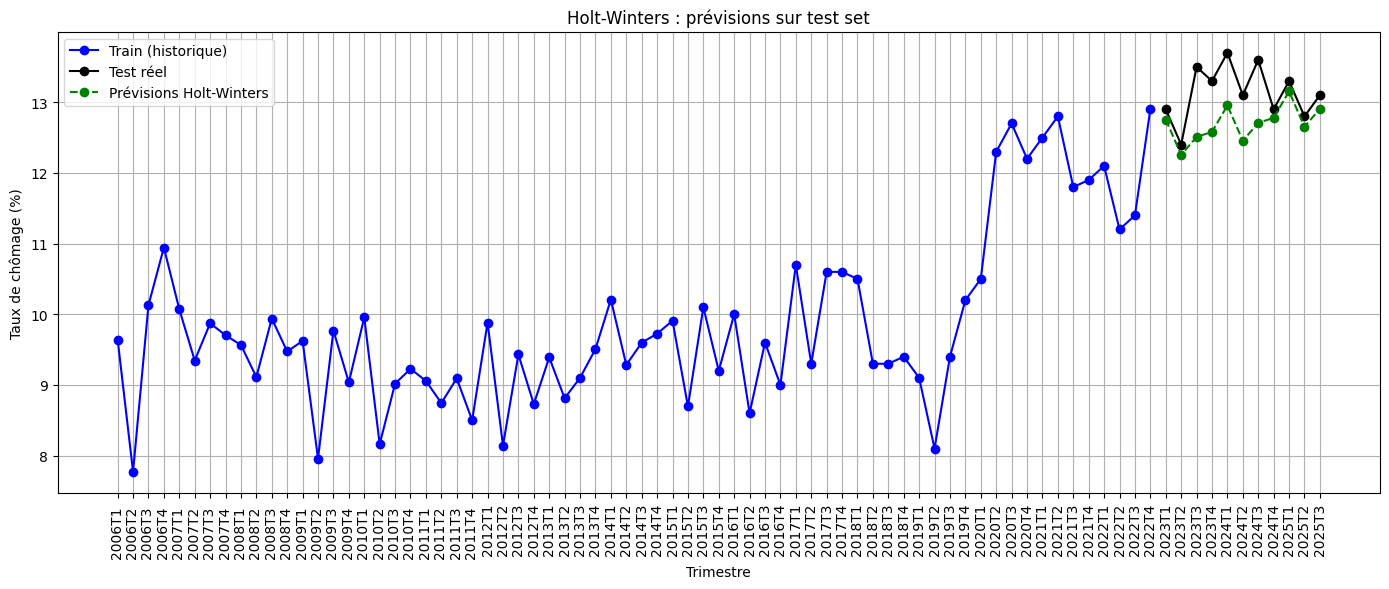

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# =========================
# Fonction pour générer les trimestres futurs
# =========================
def next_quarters(last, n):
    year, q = map(int, re.findall(r'\d+', last))
    quarters = []
    for _ in range(n):
        q += 1
        if q > 4:
            q = 1
            year += 1
        quarters.append(f"{year}T{q}")
    return quarters

# =========================
# 1️⃣ Séparer train/test
# =========================
# Par exemple : train = 2006-2022, test = 2023-2025
train_end = '2022T4'
train = df_milieu[df_milieu['Trimestre'] <= train_end]['Ensemble'].values
test = df_milieu[df_milieu['Trimestre'] > train_end]['Ensemble'].values
test_trimesters = df_milieu[df_milieu['Trimestre'] > train_end]['Trimestre'].values

# =========================
# 2️⃣ Créer et ajuster le modèle Holt-Winters
# =========================
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4)
hw_fit = hw_model.fit()

# Prévision sur la période test
forecast_hw = hw_fit.forecast(steps=len(test))

# =========================
# 3️⃣ Évaluation
# =========================
mse = mean_squared_error(test, forecast_hw)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_hw)

print(f"Holt-Winters - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# =========================
# 4️⃣ Graphique
# =========================
plt.figure(figsize=(14,6))

# Historique train
plt.plot(df_milieu[df_milieu['Trimestre'] <= train_end]['Trimestre'],
         train, marker='o', color='blue', label='Train (historique)')

# Vraies valeurs test
plt.plot(test_trimesters, test, marker='o', color='black', label='Test réel')

# Prévisions Holt-Winters
plt.plot(test_trimesters, forecast_hw, marker='o', color='green', linestyle='--', label='Prévisions Holt-Winters')

plt.xticks(rotation=90)
plt.title("Holt-Winters : prévisions sur test set")
plt.xlabel("Trimestre")
plt.ylabel("Taux de chômage (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Prévision du taux de chômage avec le modèle SARIMA

Dans cette section, nous utilisons le modèle **SARIMA** (Seasonal ARIMA) pour prédire le taux de chômage trimestriel sur la période test (2023-2025), en nous appuyant sur les données historiques de 2006 à 2022. Le modèle SARIMA permet de prendre en compte à la fois la **tendance**, la **saisonnalité** et la **composante autorégressive** de la série temporelle.

### Étapes réalisées :

1. **Séparation des données train/test**  
   - Train : trimestres de 2006 à 2022  
   - Test : trimestres de 2023 à 2025  

2. **Modélisation avec SARIMA**  
   - Paramètres choisis : `(p=1,d=1,q=1)` pour la partie non saisonnière  
   - Paramètres saisonniers : `(P=1,D=1,Q=1,s=4)` pour la saisonnalité trimestrielle  
   - Ajustement du modèle sur la période d'entraînement  

3. **Prévisions**  
   - Génération des prévisions sur la période test  
   - Comparaison des prévisions avec les valeurs réelles  

4. **Évaluation du modèle**  
   - Calcul des métriques :  
     - **MSE** : Erreur quadratique moyenne  
     - **RMSE** : Racine de l’erreur quadratique moyenne  
     - **MAE** : Erreur absolue moyenne  

5. **Visualisation**  
   - Le graphique montre :  
     - Les données historiques (train) en bleu  
     - Les valeurs réelles du test en noir  
     - Les prévisions SARIMA en violet en pointillés  

Cette approche est particulièrement adaptée pour les séries présentant une **saisonnalité régulière**, comme c’est le cas des taux de chômage trimestriels.


SARIMA - MSE: 0.1937, RMSE: 0.4401, MAE: 0.3876


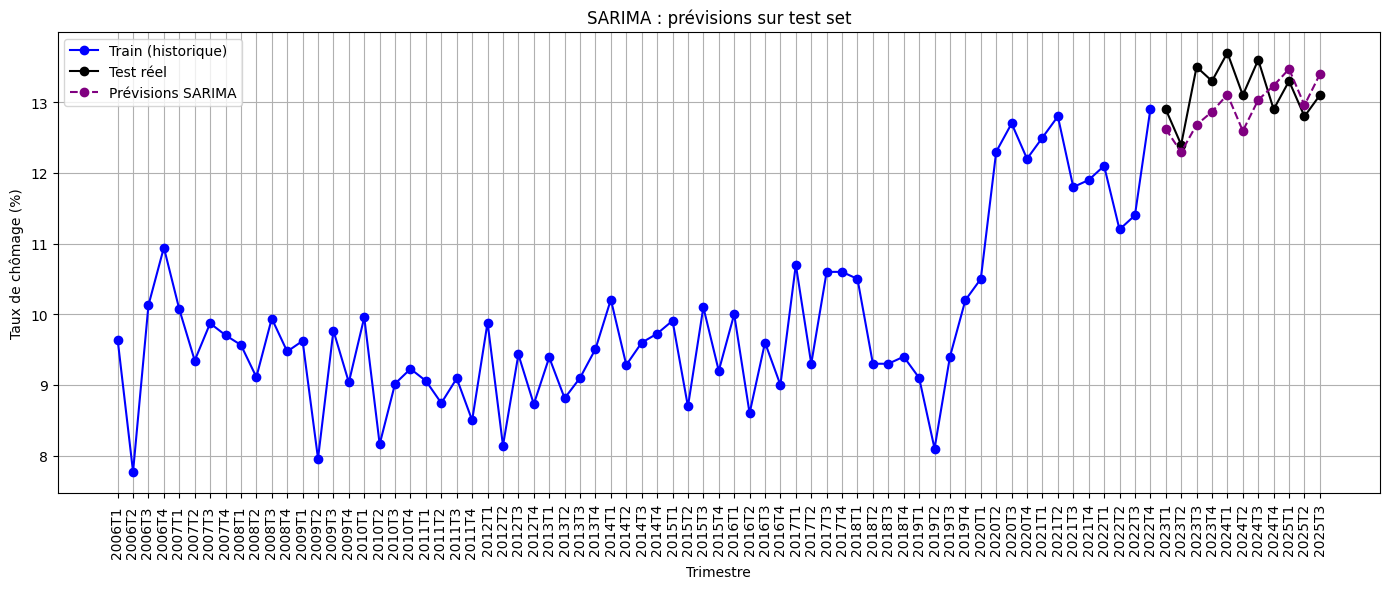

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# =========================
# 1️⃣ Séparer train/test
# =========================
# Train : 2006-2022, Test : 2023-2025
train_end = '2022T4'
train = df_milieu[df_milieu['Trimestre'] <= train_end]['Ensemble'].values
test = df_milieu[df_milieu['Trimestre'] > train_end]['Ensemble'].values
test_trimesters = df_milieu[df_milieu['Trimestre'] > train_end]['Trimestre'].values

# =========================
# 2️⃣ Créer et ajuster le modèle SARIMA
# =========================
# Exemple : SARIMA(p=1,d=1,q=1)(P=1,D=1,Q=1,s=4)
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,4))
sarima_fit = sarima_model.fit(disp=False)

# Prévision sur la période test
forecast_sarima = sarima_fit.forecast(steps=len(test))

# =========================
# 3️⃣ Évaluation
# =========================
mse = mean_squared_error(test, forecast_sarima)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_sarima)

print(f"SARIMA - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# =========================
# 4️⃣ Graphique
# =========================
plt.figure(figsize=(14,6))

# Historique train
plt.plot(df_milieu[df_milieu['Trimestre'] <= train_end]['Trimestre'],
         train, marker='o', color='blue', label='Train (historique)')

# Vraies valeurs test
plt.plot(test_trimesters, test, marker='o', color='black', label='Test réel')

# Prévisions SARIMA
plt.plot(test_trimesters, forecast_sarima, marker='o', color='purple', linestyle='--', label='Prévisions SARIMA')

plt.xticks(rotation=90)
plt.title("SARIMA : prévisions sur test set")
plt.xlabel("Trimestre")
plt.ylabel("Taux de chômage (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Comparaison des modèles de prévision

Dans cette section, nous comparons plusieurs approches pour modéliser et prévoir la série temporelle du taux de chômage "Ensemble" :

1. **Séparation des données**  
   La série est divisée en ensemble d'entraînement (2006T1 à 2022T4) et ensemble de test (2023T1 à 2025T4).  
   Cette séparation permet d’évaluer la performance de chaque modèle sur des données qu’il n’a pas vues pendant l’apprentissage.

2. **Modèles considérés**  
   - **ARIMA** : un modèle autorégressif intégré à moyenne mobile, adapté aux séries temporelles stationnaires ou rendues stationnaires par différenciation.  
   - **Holt-Winters** : modèle de lissage exponentiel avec prise en compte de la tendance et de la saisonnalité (ici trimestrielle).  
   - **SARIMA** : extension de l’ARIMA qui intègre la saisonnalité, particulièrement adaptée aux séries avec motifs saisonniers répétés.  
   - **RNN (Simple Recurrent Neural Network)** : réseau neuronal récurrent capable de capturer des dépendances temporelles dans les données.

3. **Prévisions et évaluation**  
   Chaque modèle est entraîné sur l'ensemble d'entraînement et effectue des prévisions sur l'ensemble de test.  
   Les métriques suivantes sont calculées pour évaluer la précision de chaque modèle :  
   - **MSE (Mean Squared Error)** : erreur quadratique moyenne  
   - **RMSE (Root Mean Squared Error)** : racine carrée de MSE  
   - **MAE (Mean Absolute Error)** : erreur absolue moyenne

4. **Comparaison des performances**  
   Les résultats sont présentés dans un tableau comparatif des métriques pour chaque modèle.  
   Cette analyse permet d’identifier le modèle le plus performant pour la série temporelle étudiée.

> Remarque : L’inclusion du modèle RNN permet de comparer les approches statistiques classiques avec une approche basée sur l’apprentissage profond, offrant ainsi un benchmark complet.


In [28]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# =========================
# 1️⃣ Séparer train/test
# =========================
train_end = '2022T4'
train = df_milieu[df_milieu['Trimestre'] <= train_end]['Ensemble'].values
test = df_milieu[df_milieu['Trimestre'] > train_end]['Ensemble'].values
test_trimesters = df_milieu[df_milieu['Trimestre'] > train_end]['Trimestre'].values

# =========================
# Fonction pour générer trimestres futurs
# =========================
def next_quarters(last, n):
    year, q = map(int, re.findall(r'\d+', last))
    quarters = []
    for _ in range(n):
        q += 1
        if q > 4:
            q = 1
            year += 1
        quarters.append(f"{year}T{q}")
    return quarters

steps = len(test)
future_quarters = next_quarters(train_end, steps)

# =========================
# 2️⃣ Modèle ARIMA
# =========================
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=steps)

# =========================
# 3️⃣ Holt-Winters
# =========================
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4)
hw_fit = hw_model.fit()
forecast_hw = hw_fit.forecast(steps=steps)

# =========================
# 4️⃣ SARIMA
# =========================
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,4))
sarima_fit = sarima_model.fit(disp=False)
forecast_sarima = sarima_fit.forecast(steps=steps)

# =========================
# 5️⃣ RNN
# =========================
# Normalisation
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1,1))

# Création des séquences
window = 4
X, y = [], []
for i in range(len(train_scaled)-window):
    X.append(train_scaled[i:i+window])
    y.append(train_scaled[i+window])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Modèle RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(window,1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X, y, epochs=200, batch_size=1, verbose=0)

# Prévisions RNN
last_window = train_scaled[-window:].reshape(1,window,1)
forecast_rnn = []
for _ in range(steps):
    pred_scaled = rnn_model.predict(last_window, verbose=0)
    pred = scaler.inverse_transform(pred_scaled)[0,0]
    forecast_rnn.append(pred)
    last_window = np.append(last_window[:,1:,:], pred_scaled.reshape(1,1,1), axis=1)

# =========================
# 6️⃣ Évaluation
# =========================
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

metrics = {
    'ARIMA': evaluate(test, forecast_arima),
    'Holt-Winters': evaluate(test, forecast_hw),
    'SARIMA': evaluate(test, forecast_sarima),
    'RNN': evaluate(test, forecast_rnn)
}

metrics_df = pd.DataFrame(metrics, index=['MSE','RMSE','MAE']).T
print("Comparaison des métriques :")
metrics_df


Comparaison des métriques :


MSE      RMSE       MAE
ARIMA         0.902509  0.950005  0.870267
Holt-Winters  0.309276  0.556126  0.444099
SARIMA        0.193686  0.440098  0.387621
RNN           1.209818  1.099917  1.018688

## Comparaison des prévisions à partir de 2020

Dans cette section, nous comparons les prévisions de quatre modèles différents sur la série temporelle "Ensemble", en mettant l'accent sur la période récente (à partir de 2020) pour mieux visualiser les tendances et la performance des modèles :

### 1️⃣ Préparation des données
- La série temporelle est extraite de `df_milieu`.
- La séparation train/test est effectuée :  
  - **Train** : 2006T1 à 2022T4  
  - **Test** : 2023T1 à 2025T4
- L'historique affiché sur le graphique commence à partir de 2020 pour rendre la comparaison plus lisible.

### 2️⃣ Modèles utilisés
- **ARIMA** : modèle autorégressif intégré à moyenne mobile pour capturer la dépendance temporelle.
- **Holt-Winters** : lissage exponentiel avec tendance et saisonnalité trimestrielle additive.
- **SARIMA** : extension de l'ARIMA avec composante saisonnière, adaptée aux motifs répétitifs.
- **RNN (Simple Recurrent Neural Network)** : réseau neuronal récurrent pour capturer les dépendances temporelles complexes.

### 3️⃣ Prévisions
- Chaque modèle est entraîné sur l'ensemble d'entraînement (2006–2022) et effectue des prévisions sur l'ensemble test (2023–2025).
- Les prévisions du RNN sont calculées de manière séquentielle en utilisant une fenêtre glissante sur les données normalisées.

### 4️⃣ Visualisation
- Le graphique affiche :
  - **Historique réel** depuis 2020 (en bleu)
  - **Prévisions ARIMA** (en rouge)
  - **Prévisions Holt-Winters** (en vert)
  - **Prévisions SARIMA** (en violet)
  - **Prévisions RNN** (en orange)
- L’objectif est de comparer visuellement comment chaque modèle suit la tendance réelle récente et de détecter les différences de performance.

> Cette visualisation permet d’identifier rapidement les modèles qui suivent le mieux la dynamique récente de la série temporelle et constitue une étape préliminaire avant le calcul des métriques d’évaluation.


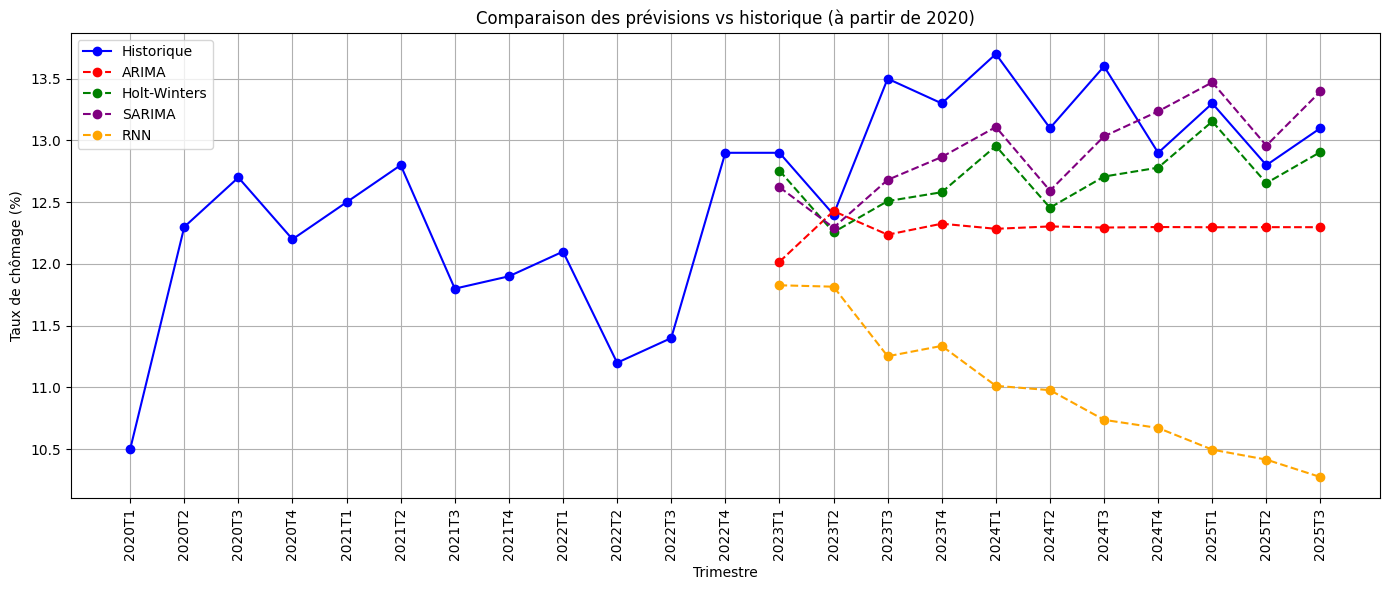

In [29]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# =========================
# Préparer les données
# =========================
series = df_milieu['Ensemble'].values
trimesters = df_milieu['Trimestre'].values

# Séparer train/test
train_end = '2022T4'
train = df_milieu[df_milieu['Trimestre'] <= train_end]['Ensemble'].values
test = df_milieu[df_milieu['Trimestre'] > train_end]['Ensemble'].values
test_trimesters = df_milieu[df_milieu['Trimestre'] > train_end]['Trimestre'].values

# Filtrer l’historique à partir de 2020
mask_hist = df_milieu['Trimestre'] >= '2020T1'
trimesters_hist = df_milieu.loc[mask_hist, 'Trimestre'].values
series_hist = df_milieu.loc[mask_hist, 'Ensemble'].values

# Fonction pour générer trimestres futurs
def next_quarters(last, n):
    year, q = map(int, re.findall(r'\d+', last))
    quarters = []
    for _ in range(n):
        q += 1
        if q > 4:
            q = 1
            year += 1
        quarters.append(f"{year}T{q}")
    return quarters

steps = len(test)
future_quarters = test_trimesters

# =========================
# 1️⃣ ARIMA
# =========================
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=steps)

# =========================
# 2️⃣ Holt-Winters
# =========================
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4)
hw_fit = hw_model.fit()
forecast_hw = hw_fit.forecast(steps=steps)

# =========================
# 3️⃣ SARIMA
# =========================
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,4))
sarima_fit = sarima_model.fit(disp=False)
forecast_sarima = sarima_fit.forecast(steps=steps)

# =========================
# 4️⃣ RNN
# =========================
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1,1))

window = 4
X, y = [], []
for i in range(len(train_scaled)-window):
    X.append(train_scaled[i:i+window])
    y.append(train_scaled[i+window])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1],1))

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(window,1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X, y, epochs=200, batch_size=1, verbose=0)

last_window = train_scaled[-window:].reshape(1,window,1)
forecast_rnn = []
for _ in range(steps):
    pred_scaled = rnn_model.predict(last_window, verbose=0)
    pred = scaler.inverse_transform(pred_scaled)[0,0]
    forecast_rnn.append(pred)
    last_window = np.append(last_window[:,1:,:], pred_scaled.reshape(1,1,1), axis=1)

# =========================
# 5️⃣ Graphique comparatif à partir de 2020
# =========================
plt.figure(figsize=(14,6))

# Historique depuis 2020
plt.plot(trimesters_hist, series_hist, marker='o', color='blue', label='Historique')

# Prévisions sur test
plt.plot(future_quarters, forecast_arima, marker='o', linestyle='--', color='red', label='ARIMA')
plt.plot(future_quarters, forecast_hw, marker='o', linestyle='--', color='green', label='Holt-Winters')
plt.plot(future_quarters, forecast_sarima, marker='o', linestyle='--', color='purple', label='SARIMA')
plt.plot(future_quarters, forecast_rnn, marker='o', linestyle='--', color='orange', label='RNN')

plt.xticks(rotation=90)
plt.title("Comparaison des prévisions vs historique (à partir de 2020)")
plt.xlabel("Trimestre")
plt.ylabel("Taux de chômage (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Évaluation des modèles sur la période test

Après avoir effectué les prévisions avec les quatre modèles (ARIMA, Holt-Winters, SARIMA et RNN), nous procédons à l'évaluation de leur performance sur l'ensemble test (2023–2025).

### 1️⃣ Vraies valeurs
- Les valeurs réelles sur la période test sont extraites de la colonne `Ensemble` de `df_milieu`.

### 2️⃣ Métriques utilisées
Pour comparer les modèles, nous calculons trois métriques classiques de précision :

- **RMSE (Root Mean Squared Error)** : mesure l'erreur quadratique moyenne, sensible aux grandes erreurs.
- **MAE (Mean Absolute Error)** : moyenne des erreurs absolues, donne une idée générale de l'écart.
- **MAPE (Mean Absolute Percentage Error)** : erreur moyenne en pourcentage, utile pour comparer les modèles sur différentes échelles.

### 3️⃣ Calcul des métriques
- Chaque modèle prédit les valeurs sur la période test.
- Les trois métriques sont calculées pour chaque modèle.
- Les résultats sont organisés dans un tableau récapitulatif (`metrics_df`) trié par RMSE croissant.

### 4️⃣ Sélection du meilleur modèle
- Le meilleur modèle est celui ayant la **plus faible RMSE**, indiquant qu’il suit le plus fidèlement les données réelles.
- Le nom du modèle est affiché pour référence rapide.

> Cette étape permet de quantifier la performance des modèles et de déterminer lequel est le plus adapté pour les prévisions de la série temporelle.


In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# =========================
# Vraies valeurs sur la période test
# =========================
y_true = test

# =========================
# Calcul des métriques
# =========================
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

metrics = {}

metrics['ARIMA'] = {
    'RMSE': np.sqrt(mean_squared_error(y_true, forecast_arima)),
    'MAE': mean_absolute_error(y_true, forecast_arima),
    'MAPE': mape(y_true, forecast_arima)
}

metrics['Holt-Winters'] = {
    'RMSE': np.sqrt(mean_squared_error(y_true, forecast_hw)),
    'MAE': mean_absolute_error(y_true, forecast_hw),
    'MAPE': mape(y_true, forecast_hw)
}

metrics['SARIMA'] = {
    'RMSE': np.sqrt(mean_squared_error(y_true, forecast_sarima)),
    'MAE': mean_absolute_error(y_true, forecast_sarima),
    'MAPE': mape(y_true, forecast_sarima)
}

metrics['RNN'] = {
    'RMSE': np.sqrt(mean_squared_error(y_true, forecast_rnn)),
    'MAE': mean_absolute_error(y_true, forecast_rnn),
    'MAPE': mape(y_true, forecast_rnn)
}

# =========================
# Tableau récapitulatif
# =========================
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.sort_values('RMSE')  # Tri par RMSE
print("=== Performance des modèles sur la période test ===")
print(metrics_df)

# =========================
# Meilleur modèle selon RMSE
# =========================
best_model = metrics_df.index[0]
print(f"\n✅ Le meilleur modèle selon RMSE est : {best_model}")


=== Performance des modèles sur la période test ===
                  RMSE       MAE       MAPE
SARIMA        0.440098  0.387621   2.916693
Holt-Winters  0.556126  0.444099   3.326065
ARIMA         0.950005  0.870267   6.545570
RNN           2.272413  2.161785  16.348713

✅ Le meilleur modèle selon RMSE est : SARIMA


# Prédiction du taux de chômage avec LSTM

Ce workflow présente la transformation des données trimestrielles en données mensuelles, l'entraînement d'un modèle LSTM, et la prédiction du taux de chômage pour la période test.



## Transformation trimestrielle → mensuelle aléatoire

- Chaque trimestre est divisé en 3 mois.  
- Des valeurs aléatoires positives sont générées pour chaque mois.  
- La moyenne de ces 3 valeurs correspond exactement à la valeur trimestrielle originale.  
- Ceci permet d’augmenter la granularité des données pour l'utilisation dans un modèle LSTM.

**Étapes principales :**
1. Copier le DataFrame original `df_milieu` et nettoyer les noms de colonnes.
2. Générer 3 nombres aléatoires pour chaque trimestre.
3. Normaliser ces valeurs pour que leur moyenne soit égale à la valeur trimestrielle.
4. Créer un DataFrame mensuel avec un index de dates correspondant aux mois.

**Résultat :**
- Un DataFrame mensuel `df_monthly` prêt pour la modélisation LSTM.

---

## Préparation des données et création des séquences LSTM

- Définir les périodes d'entraînement (2006-2022) et de test (2023-2025).  
- Normaliser les données d’entraînement avec `MinMaxScaler`.  
- Créer des séquences de longueur 12 mois pour entraîner le LSTM (chaque séquence prédit le mois suivant).  
- Reshaper les données pour correspondre à l’entrée LSTM `[samples, timesteps, features]`.

**Objectif :**
- Préparer les données sous forme séquentielle adaptée à l’apprentissage temporel.

---

## Création et entraînement du modèle LSTM

- Modèle `Sequential` avec :
  - Une couche LSTM de 50 unités avec activation `relu`.
  - Une couche Dense finale pour produire la prédiction.
- Compilation avec l'optimiseur `adam` et la fonction de perte `mse`.
- Utilisation de `EarlyStopping` pour arrêter l’entraînement si la validation ne s’améliore pas.

**Objectif :**
- Apprendre les tendances temporelles du taux de chômage à partir des données mensuelles.

---

## Prédiction et évaluation

- Prédiction sur la période de test.
- Inverse scaling pour revenir aux valeurs originales.
- Calcul des métriques de performance :
  - MSE : Mean Squared Error
  - RMSE : Root Mean Squared Error
  - MAE : Mean Absolute Error

**Objectif :**
- Mesurer la qualité des prédictions et la précision du modèle sur les données non vues.

---

## Visualisation

- Tracé des valeurs réelles et des prédictions LSTM sur la période de test.
- Graphique :
  - Axe X : mois de la période test.
  - Axe Y : taux de chômage (%).
- Permet de comparer visuellement la qualité des prédictions du modèle.

**Conclusion :**
- Ce workflow permet de transformer des données trimestrielles en mensuelles, d’entraîner un LSTM et de visualiser les prédictions sur les périodes futures.

In [31]:
import numpy as np
import pandas as pd

# Suppose df_milieu contient les trimestres et 'Ensemble'
df = df_milieu.copy()
df.columns = df.columns.str.replace('\xa0', '', regex=False).str.strip()

monthly_values = []

for val in df['Ensemble']:
    # Générer 3 nombres aléatoires positifs
    r = np.random.rand(3)
    # Normaliser pour que la moyenne = 1
    r = r / r.mean() * val
    monthly_values.extend(r)

# Vérification
monthly_values = np.array(monthly_values)
# La moyenne de chaque groupe de 3 = valeur du trimestre original
for i, val in enumerate(df['Ensemble']):
    avg = monthly_values[i*3:(i+1)*3].mean()
    assert np.isclose(avg, val), f"Erreur à l'indice {i}"

# Création d'un DataFrame mensuel
dates = pd.date_range(start='2006-01-01', periods=len(monthly_values), freq='M')
df_monthly = pd.DataFrame({'Ensemble': monthly_values}, index=dates)
df_monthly


Ensemble
2006-01-31   0.417882
2006-02-28  13.567922
2006-03-31  14.939821
2006-04-30   8.518516
2006-05-31  11.040360
...               ...
2025-05-31  16.469817
2025-06-30   8.425230
2025-07-31   6.386289
2025-08-31  32.706184
2025-09-30   0.207527

[237 rows x 1 columns]

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -------------------------------
# 1️⃣ Nettoyage du DataFrame
# -------------------------------
df = df_milieu.copy()
df.columns = df.columns.str.replace('\xa0', '', regex=False).str.strip()

# -------------------------------
# 2️⃣ Transformation trimestrielle → mensuelle aléatoire
# -------------------------------
monthly_values = []

for val in df['Ensemble']:
    r = np.random.rand(3)          # 3 nombres aléatoires
    r = r / r.mean() * val          # normaliser pour que la moyenne = val
    monthly_values.extend(r)

monthly_values = np.array(monthly_values)

# DataFrame mensuel
dates = pd.date_range(start='2006-01-01', periods=len(monthly_values), freq='M')
df_monthly = pd.DataFrame({'Ensemble': monthly_values}, index=dates)

# -------------------------------
# 3️⃣ Définir train/test par période
# -------------------------------
train_end = '2022-12-31'  # fin de l'entraînement
test_start = '2023-01-01'  # début du test

train_data = df_monthly.loc[:train_end]
test_data = df_monthly.loc[test_start:]

# -------------------------------
# 4️⃣ Normalisation (Scaler sur train)
# -------------------------------
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Ensemble']])
test_scaled = scaler.transform(test_data[['Ensemble']])

# -------------------------------
# 5️⃣ Création des séquences
# -------------------------------
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # 12 mois → prédire le mois suivant
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Reshape pour LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# -------------------------------
# 6️⃣ Création et entraînement du LSTM
# -------------------------------
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200, batch_size=8,
                    verbose=1, callbacks=[early_stop])

# -------------------------------
# 7️⃣ Prédiction et inverse scaling
# -------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# -------------------------------
# 8️⃣ Évaluation
# -------------------------------
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")



Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1403 - val_loss: 0.1258
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0545 - val_loss: 0.1000
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0436 - val_loss: 0.0931
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - val_loss: 0.0929
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0514 - val_loss: 0.0923
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0435 - val_loss: 0.0956
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - val_loss: 0.0915
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - val_loss: 0.0919
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0399 - val_loss: 0.0933
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - val_loss: 0.0878
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - val_loss: 0.0908
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

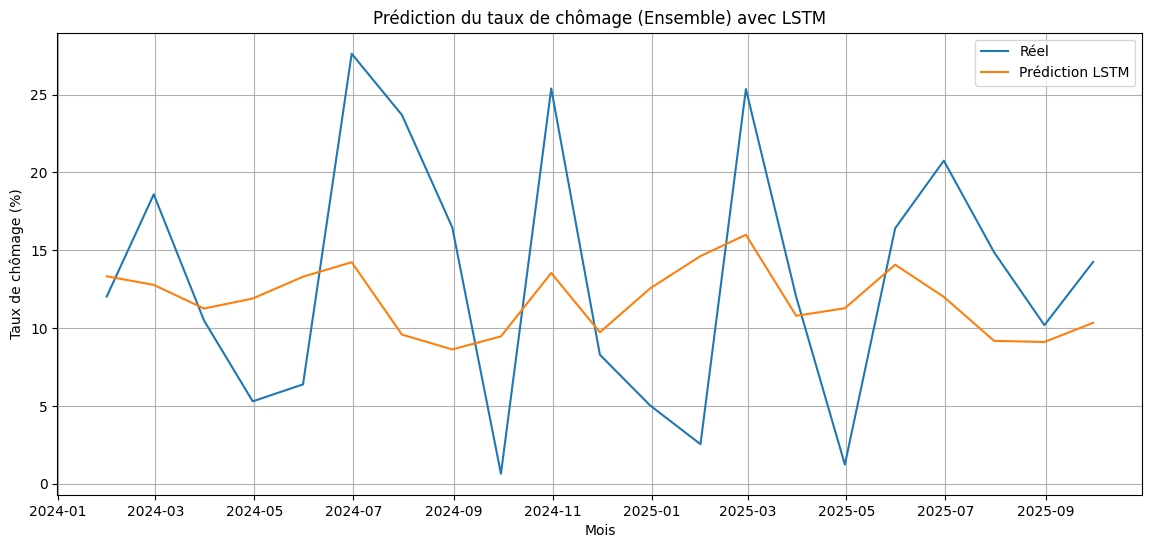

In [33]:
# Dates correspondantes aux y_test (en excluant les 12 premiers mois du test)
test_dates = test_data.index[seq_length:]

plt.figure(figsize=(14,6))
plt.plot(test_dates, y_true, label='Réel')
plt.plot(test_dates, y_pred, label='Prédiction LSTM')
plt.title("Prédiction du taux de chômage (Ensemble) avec LSTM")
plt.xlabel("Mois")
plt.ylabel("Taux de chômage (%)")
plt.legend()
plt.grid(True)
plt.show()


Sauvegarde du modèle SARIMA

In [35]:
# =========================
# Sauvegarde du modèle SARIMA dans Kaggle
# =========================
save_path = "/kaggle/working/sarima_model.pkl"   # Dossier local Kaggle

sarima_fit.save(save_path)

print("Modèle SARIMA sauvegardé dans :", save_path)


Modèle SARIMA sauvegardé dans : /kaggle/working/sarima_model.pkl


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

# Dossier où enregistrer tous les modèles
save_path = "/kaggle/working/"

# ===============================
# 1️⃣ Dictionnaire des catégories
# ===============================
colonnes_a_modeliser = {
    # Milieu
    "urbain": ("df_milieu", "Urbain"),
    "rural": ("df_milieu", "Rural"),

    # Sexe
    "masculin": ("df_sexe", "Masculin"),
    "feminin": ("df_sexe", "Féminin"),

    # Diplôme
    "sans_diplome": ("df_diplome", "Sans diplôme"),
    "niveau_moyen": ("df_diplome", "Ayant un diplôme:  Niveau moyen"),
    "niveau_superieur": ("df_diplome", "Ayant un diplôme:  Niveau supérieur"),

    # Âge
    "age_15_24": ("df_tranche_age", "15 - 24"),
    "age_25_34": ("df_tranche_age", "25 - 34"),
    "age_35_44": ("df_tranche_age", "35 - 44"),
    "age_45_plus": ("df_tranche_age", "45 et plus")
}

# ===============================
# 2️⃣ Entraînement + sauvegarde
# ===============================
for nom, (df_name, col) in colonnes_a_modeliser.items():

    print(f"\n📌 Entraînement du modèle pour : {nom} ({col})")

    # Récupération du bon DataFrame
    df = globals()[df_name]

    # Extraction des valeurs
    data = df[col].values

    # Création du modèle SARIMA
    model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,4))
    fit = model.fit(disp=False)

    # ____________________________
    #  Sauvegarde dans working/
    # ____________________________
    filename = f"sarima_{nom}.pkl"
    filepath = os.path.join(save_path, filename)

    fit.save(filepath)

    print(f"✔ Modèle sauvegardé : {filepath}")

print("\n🎉 Tous les modèles sont maintenant enregistrés dans /kaggle/working/ !")



📌 Entraînement du modèle pour : urbain (Urbain)
✔ Modèle sauvegardé : /kaggle/working/sarima_urbain.pkl

📌 Entraînement du modèle pour : rural (Rural)
✔ Modèle sauvegardé : /kaggle/working/sarima_rural.pkl

📌 Entraînement du modèle pour : masculin (Masculin)
✔ Modèle sauvegardé : /kaggle/working/sarima_masculin.pkl

📌 Entraînement du modèle pour : feminin (Féminin)
✔ Modèle sauvegardé : /kaggle/working/sarima_feminin.pkl

📌 Entraînement du modèle pour : sans_diplome (Sans diplôme)
✔ Modèle sauvegardé : /kaggle/working/sarima_sans_diplome.pkl

📌 Entraînement du modèle pour : niveau_moyen (Ayant un diplôme:  Niveau moyen)
✔ Modèle sauvegardé : /kaggle/working/sarima_niveau_moyen.pkl

📌 Entraînement du modèle pour : niveau_superieur (Ayant un diplôme:  Niveau supérieur)
✔ Modèle sauvegardé : /kaggle/working/sarima_niveau_superieur.pkl

📌 Entraînement du modèle pour : age_15_24 (15 - 24)
✔ Modèle sauvegardé : /kaggle/working/sarima_age_15_24.pkl

📌 Entraînement du modèle pour : age_25_34 